<h1>Hospitalizaciones</h1>
<p>Hemos sido contratados en el equipo de ciencia de datos en una consultora de renombre. Nos han asignado a un proyecto de estudio de atención en salud para un importante hospital. Nuestro cliente desea saber las características más importantes que tienen los pacientes de cierto tipo de enfermedad que terminan en hospitalización. Fue definido como caso aquel paciente que fue sometido a biopsia prostática y que en un periodo máximo de 30 días posteriores al procedimiento presentó fiebre, infección urinaria o sepsis; requiriendo manejo médico ambulatorio u hospitalizado para la resolución de la complicación y como control al paciente que fue sometido a biopsia prostática y que no presentó complicaciones infecciosas en el período de 30 días posteriores al procedimiento. Dado que tienen en su base de datos algunos datos referentes a los pacientes y resultados de exámenes diagnósticos, de pacientes hospitalizados y no hospitalizados, nos han entregado esta información.</p>
<p>Para ello, nuestro departamento de datos ha recopilado `Antecedentes del paciente`, `Morbilidad asociada al paciente` y `Antecedentes relacionados con la toma de la biopsia`y `Complicaciones infecciosas`. El departamente de datos advierte que hay algunos problemas de calidad de datos en la información suministrada por lo que el primer reto del equipo es realizar un análisis exploratorio de los datos con el fin de transformar y preparar las datos adecuadamente.</p>

# 1. Análisis Exploratorio

## Importar Excel

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("BBDD_Hospitalización.xlsx","Datos")
df.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


## Información del dataframe, renombrar columnas y conteo de nulos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

<h6>Se renombraron las columnas para mayor comodidad:</h6>

*   EDAD: edad
*   DIABETES: diabetes
*   HOSPITALIZACIÓN ULTIMO MES: hosp_ultimo_mes
*   PSA: psa
*   BIOPSIAS PREVIAS: biopsias_previas
*   VOLUMEN PROSTATICO: volumen_prostatico
*   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS: antibiotico_profilaxis
*   NUMERO DE MUESTRAS TOMADAS: numero_muestras
*   CUP: cup
*   ENF. CRONICA PULMONAR OBSTRUCTIVA: biopsia
*   NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA: dias_post_biopsia_complicacion
*   FIEBRE: fiebre
*   ITU: itu
*   TIPO DE CULTIVO: tipo_cultivo
*   AGENTE AISLADO: agente_aislado
*   PATRON DE RESISTENCIA: patron_resistencia
*   HOSPITALIZACION: hospitalizacion
*   DIAS HOSPITALIZACION MQ: dias_hosp_mq
*   DIAS HOSPITALIZACIÓN UPC: dias_hosp_upc

In [4]:
df = df.set_axis(["edad", "diabetes", "hosp_ultimo_mes", "psa", "biopsias_previas",
             "volumen_prostatico", "antibiotico_profilaxis", "numero_muestras",
             "cup", "enfermedad_pulmonar", "biopsia", "dias_post_biopsia_complicacion",
             "fiebre", "itu", "tipo_cultivo", "agente_aislado", "patron_resistencia",
             "hospitalizacion", "dias_hosp_mq", "dias_hosp_upc"], axis=1)
df

,edad,diabetes,hosp_ultimo_mes,psa,biopsias_previas,volumen_prostatico,antibiotico_profilaxis,numero_muestras,cup,enfermedad_pulmonar,biopsia,dias_post_biopsia_complicacion,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
0,53.0,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
566,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
567,59.0,NO,NO,9.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isna().sum()

edad                               2
diabetes                           2
hosp_ultimo_mes                    2
psa                                6
biopsias_previas                   4
volumen_prostatico                 3
antibiotico_profilaxis             2
numero_muestras                    2
cup                                3
enfermedad_pulmonar                4
biopsia                            2
dias_post_biopsia_complicacion     2
fiebre                             2
itu                                2
tipo_cultivo                       2
agente_aislado                    19
patron_resistencia                 2
hospitalizacion                    5
dias_hosp_mq                       2
dias_hosp_upc                      2
dtype: int64

Dado que es probable que los nulos en la mayoría de las columnas (las que aparecen con 2 nulos) sean en realidad registros nulos, se empezará explorando la columna Edad.

### Nulos en Edad

In [6]:
df[df.edad.isna()]

,edad,diabetes,hosp_ultimo_mes,psa,biopsias_previas,volumen_prostatico,antibiotico_profilaxis,numero_muestras,cup,enfermedad_pulmonar,biopsia,dias_post_biopsia_complicacion,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Como se puede notar, estas filas son registros nulos, por lo que se eliminarán del dataframe.

In [7]:
df.drop(df[df.edad.isna()].index,inplace=True)

In [8]:
df[df.edad.isna()]

,edad,diabetes,hosp_ultimo_mes,psa,biopsias_previas,volumen_prostatico,antibiotico_profilaxis,numero_muestras,cup,enfermedad_pulmonar,biopsia,dias_post_biopsia_complicacion,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc


Sin los registros nulos, se empezará a explorar y manejar los nulos resultantes. En la mayoría de casos, y a falta de un mejor criterio, se considerará que los nulos corresponden al estado por defecto/deseable en términos de buena salud.

In [9]:
df.isna().sum()

edad                               0
diabetes                           0
hosp_ultimo_mes                    0
psa                                4
biopsias_previas                   2
volumen_prostatico                 1
antibiotico_profilaxis             0
numero_muestras                    0
cup                                1
enfermedad_pulmonar                2
biopsia                            0
dias_post_biopsia_complicacion     0
fiebre                             0
itu                                0
tipo_cultivo                       0
agente_aislado                    17
patron_resistencia                 0
hospitalizacion                    3
dias_hosp_mq                       0
dias_hosp_upc                      0
dtype: int64

### Nulos en volumen_prostatico, cup, biopsias_previas, enfermedad_pulmonar, hospitalizacion y agente_aislado

In [10]:
df[df.volumen_prostatico.isna()]

,edad,diabetes,hosp_ultimo_mes,psa,biopsias_previas,volumen_prostatico,antibiotico_profilaxis,numero_muestras,cup,enfermedad_pulmonar,biopsia,dias_post_biopsia_complicacion,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


In [11]:
df.volumen_prostatico.unique()

array(['SI', 'NO', nan], dtype=object)

In [12]:
df.volumen_prostatico.fillna("NO", inplace=True)

In [13]:
df[df.volumen_prostatico.isna()]

,edad,diabetes,hosp_ultimo_mes,psa,biopsias_previas,volumen_prostatico,antibiotico_profilaxis,numero_muestras,cup,enfermedad_pulmonar,biopsia,dias_post_biopsia_complicacion,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc


In [14]:
df[df.cup.isna()]

,edad,diabetes,hosp_ultimo_mes,psa,biopsias_previas,volumen_prostatico,antibiotico_profilaxis,numero_muestras,cup,enfermedad_pulmonar,biopsia,dias_post_biopsia_complicacion,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
565,69.0,NO,NO,4.43,NaN,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


In [15]:
df.cup.unique()

array(['NO', 'SI', nan], dtype=object)

In [16]:
df.cup.fillna("NO", inplace=True)

In [17]:
df[df.cup.isna()]

,edad,diabetes,hosp_ultimo_mes,psa,biopsias_previas,volumen_prostatico,antibiotico_profilaxis,numero_muestras,cup,enfermedad_pulmonar,biopsia,dias_post_biopsia_complicacion,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc


In [18]:
df[df.biopsias_previas.isna()]

,edad,diabetes,hosp_ultimo_mes,psa,biopsias_previas,volumen_prostatico,antibiotico_profilaxis,numero_muestras,cup,enfermedad_pulmonar,biopsia,dias_post_biopsia_complicacion,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
92,58.0,NO,NO,7.80,NaN,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
565,69.0,NO,NO,4.43,NaN,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


In [19]:
df.biopsias_previas.unique()

array(['NO', 'SI', nan], dtype=object)

In [20]:
df.biopsias_previas.fillna("NO", inplace=True)

In [21]:
df[df.biopsias_previas.isna()]

,edad,diabetes,hosp_ultimo_mes,psa,biopsias_previas,volumen_prostatico,antibiotico_profilaxis,numero_muestras,cup,enfermedad_pulmonar,biopsia,dias_post_biopsia_complicacion,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc


In [22]:
df[df.enfermedad_pulmonar.isna()]

,edad,diabetes,hosp_ultimo_mes,psa,biopsias_previas,volumen_prostatico,antibiotico_profilaxis,numero_muestras,cup,enfermedad_pulmonar,biopsia,dias_post_biopsia_complicacion,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
566,67.0,NO,NO,8.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
567,59.0,NO,NO,9.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


In [23]:
df.enfermedad_pulmonar.unique()

array(['NO', 'SI, EPOC', 'SI, ASMA', 'SI', nan], dtype=object)

In [24]:
df.enfermedad_pulmonar.fillna("NO", inplace=True)

In [25]:
df[df.enfermedad_pulmonar.isna()]

,edad,diabetes,hosp_ultimo_mes,psa,biopsias_previas,volumen_prostatico,antibiotico_profilaxis,numero_muestras,cup,enfermedad_pulmonar,biopsia,dias_post_biopsia_complicacion,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc


In [26]:
df[df.hospitalizacion.isna()]

,edad,diabetes,hosp_ultimo_mes,psa,biopsias_previas,volumen_prostatico,antibiotico_profilaxis,numero_muestras,cup,enfermedad_pulmonar,biopsia,dias_post_biopsia_complicacion,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
31,63.0,NO,NO,10.8,NO,NO,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, ASMA",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
100,74.0,NO,NO,5.8,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
109,61.0,NO,NO,7.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0


In [27]:
df.hospitalizacion.unique()

array(['SI', 'NO', nan], dtype=object)

In [28]:
df.hospitalizacion.fillna("NO", inplace=True)

In [29]:
df[df.hospitalizacion.isna()]

,edad,diabetes,hosp_ultimo_mes,psa,biopsias_previas,volumen_prostatico,antibiotico_profilaxis,numero_muestras,cup,enfermedad_pulmonar,biopsia,dias_post_biopsia_complicacion,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc


In [30]:
df[df.agente_aislado.isna()]

,edad,diabetes,hosp_ultimo_mes,psa,biopsias_previas,volumen_prostatico,antibiotico_profilaxis,numero_muestras,cup,enfermedad_pulmonar,biopsia,dias_post_biopsia_complicacion,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
26,75.0,NO,NO,25.00,NO,SI,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
99,70.0,NO,NO,7.20,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
106,65.0,NO,NO,5.97,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
115,56.0,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
116,55.0,NO,NO,17.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
126,74.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
128,69.0,NO,NO,13.40,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
129,63.0,NO,NO,11.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
130,63.0,NO,NO,21.30,SI,SI,OTROS,24.0,NO,NO,NEG,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
138,64.0,NO,NO,15.60,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0


In [31]:
df.agente_aislado.unique()

array(['NO', 'E.COLI', 'PSEUDOMONAS AERUGINOSA', nan], dtype=object)

In [32]:
df.agente_aislado.fillna("NO", inplace=True)

In [33]:
df[df.agente_aislado.isna()]

,edad,diabetes,hosp_ultimo_mes,psa,biopsias_previas,volumen_prostatico,antibiotico_profilaxis,numero_muestras,cup,enfermedad_pulmonar,biopsia,dias_post_biopsia_complicacion,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc


### Nulos en psa

<p>Como se observa más adelante, la columna psa contiene los resultados del examen PSA para detección del cancer de próstata. En este caso, y considerando que en general son muestras de individuos que reflejan alguna complicación de salud, se utilizará el valor 4, que indicaría el límite de alerta de la posibilidad de padecer cáncer de próstata.

In [34]:
df[df.psa.isna()]

,edad,diabetes,hosp_ultimo_mes,psa,biopsias_previas,volumen_prostatico,antibiotico_profilaxis,numero_muestras,cup,enfermedad_pulmonar,biopsia,dias_post_biopsia_complicacion,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
9,44.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,3.0,0.0
76,57.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,18.0,NO,NO,HIPERPLASIA PROSTATICA,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
103,60.0,NO,NO,NaN,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,16.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
121,62.0,NO,NO,NaN,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,NO,NO,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


In [35]:
df.psa.unique()

array([  4.  ,   7.7 ,  29.  ,   7.  ,   6.2 ,   6.  ,    nan,   5.7 ,
         4.3 ,   5.19,   4.5 ,  14.  ,  10.  ,   9.  ,  25.  ,  91.8 ,
        21.  ,  98.  ,   7.5 ,  10.8 ,  10.5 ,  90.  ,   5.1 ,  16.  ,
        17.  ,  23.  ,   6.4 , 100.  ,   5.8 ,  38.9 ,  20.  ,  40.  ,
         9.5 ,   9.6 ,  10.2 ,   8.5 ,  53.  ,  19.  ,   5.6 ,   3.5 ,
        15.  ,   5.2 ,  17.7 ,   4.6 ,   8.  ,   8.7 ,   4.8 ,   7.6 ,
        10.6 ,   4.7 ,  18.  ,  27.  ,   5.  ,   8.39,   4.79,   6.8 ,
         4.9 ,   7.8 ,  16.2 ,   8.3 ,   6.5 ,   7.2 ,   5.97,   6.98,
        12.  ,  24.  ,   8.9 ,   6.3 ,   9.3 ,  12.6 ,   5.5 ,  13.8 ,
        13.4 ,  11.  ,  21.3 ,   7.1 ,  11.9 ,   3.8 ,  15.6 ,   5.4 ,
        22.  ,  12.8 ,   4.1 ,   2.  ,   9.4 ,   4.49,  11.5 ,   5.31,
        33.6 ,  48.3 ,   5.11,   8.8 ,  26.  ,   0.6 ,  31.  ,  27.6 ,
        83.  ,  15.85,  20.2 ,  14.9 ,   2.5 ,   3.9 ,  18.2 ,  28.  ,
        33.8 ,  28.6 ,  21.1 ,  30.  ,  13.5 ,   3.  ,  21.9 ,  43.9 ,
      

In [36]:
df.psa.fillna(4, inplace=True)

In [37]:
df[df.psa.isna()]

,edad,diabetes,hosp_ultimo_mes,psa,biopsias_previas,volumen_prostatico,antibiotico_profilaxis,numero_muestras,cup,enfermedad_pulmonar,biopsia,dias_post_biopsia_complicacion,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc


## Análisis de las columnas

<p>A continuación se analizarán los valores de cada una de las columnas, para identificar si es necesario realizar cambios de tipos, normalizar/estandarizar variables, etc.

In [38]:
shape = df.shape[0]
shape

568

In [39]:
for c in df.columns:
  print(f"Valores de la columna {c}: {df[c].unique()}\n")

Valores de la columna edad: [ 53.  56.  57.  55.  67.  69.  44.  54.  68.  43.  65.  62.  71.  64.
  77.  75.  73.  63.  66.  84.  42.  61.  47.  48.  49.  81.  52.  74.
  70.  58.  59.  60.  50. 143. 151.  76.  78.  46.  51.  79.  39.  72.
  80.  45.  82.]

Valores de la columna diabetes: ['NO' 'SI']

Valores de la columna hosp_ultimo_mes: ['NO' 'SI']

Valores de la columna psa: [  4.     7.7   29.     7.     6.2    6.     5.7    4.3    5.19   4.5
  14.    10.     9.    25.    91.8   21.    98.     7.5   10.8   10.5
  90.     5.1   16.    17.    23.     6.4  100.     5.8   38.9   20.
  40.     9.5    9.6   10.2    8.5   53.    19.     5.6    3.5   15.
   5.2   17.7    4.6    8.     8.7    4.8    7.6   10.6    4.7   18.
  27.     5.     8.39   4.79   6.8    4.9    7.8   16.2    8.3    6.5
   7.2    5.97   6.98  12.    24.     8.9    6.3    9.3   12.6    5.5
  13.8   13.4   11.    21.3    7.1   11.9    3.8   15.6    5.4   22.
  12.8    4.1    2.     9.4    4.49  11.5    5.31  33.6   48.

<p>Como se puede notar, no hay problemas de alta o baja cardinalidad en ninguna de las columnas (no se considera opciones de SI/NO como baja cardinalidad), pero se deben hacer algunas correcciones en cuanto a la forma en que se almacenan los datos.

### Cambiar edad, numero_muestras, dias_hosp_mq y dias_hosp_upc a enteros

In [40]:
df.edad = df.edad.astype(np.int16)

In [41]:
df.numero_muestras = df.numero_muestras.astype(np.int16)

In [42]:
df.dias_hosp_mq = df.dias_hosp_mq.astype(np.int16)

In [43]:
df.dias_hosp_upc = df.dias_hosp_upc.astype(np.int16)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   edad                            568 non-null    int16  
 1   diabetes                        568 non-null    object 
 2   hosp_ultimo_mes                 568 non-null    object 
 3   psa                             568 non-null    float64
 4   biopsias_previas                568 non-null    object 
 5   volumen_prostatico              568 non-null    object 
 6   antibiotico_profilaxis          568 non-null    object 
 7   numero_muestras                 568 non-null    int16  
 8   cup                             568 non-null    object 
 9   enfermedad_pulmonar             568 non-null    object 
 10  biopsia                         568 non-null    object 
 11  dias_post_biopsia_complicacion  568 non-null    object 
 12  fiebre                          568 

### Columna dias_post_biopsia_complicacion

In [45]:
df.dias_post_biopsia_complicacion = df.dias_post_biopsia_complicacion.replace("NO", 0).astype(int)

In [46]:
df.dias_post_biopsia_complicacion.unique()

array([1, 2, 3, 5, 9, 0])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   edad                            568 non-null    int16  
 1   diabetes                        568 non-null    object 
 2   hosp_ultimo_mes                 568 non-null    object 
 3   psa                             568 non-null    float64
 4   biopsias_previas                568 non-null    object 
 5   volumen_prostatico              568 non-null    object 
 6   antibiotico_profilaxis          568 non-null    object 
 7   numero_muestras                 568 non-null    int16  
 8   cup                             568 non-null    object 
 9   enfermedad_pulmonar             568 non-null    object 
 10  biopsia                         568 non-null    object 
 11  dias_post_biopsia_complicacion  568 non-null    int64  
 12  fiebre                          568 

### Columnas altamente relacionadas con la variable de salida

In [48]:
df.drop(["dias_hosp_mq", "dias_hosp_upc"], axis="columns", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   edad                            568 non-null    int16  
 1   diabetes                        568 non-null    object 
 2   hosp_ultimo_mes                 568 non-null    object 
 3   psa                             568 non-null    float64
 4   biopsias_previas                568 non-null    object 
 5   volumen_prostatico              568 non-null    object 
 6   antibiotico_profilaxis          568 non-null    object 
 7   numero_muestras                 568 non-null    int16  
 8   cup                             568 non-null    object 
 9   enfermedad_pulmonar             568 non-null    object 
 10  biopsia                         568 non-null    object 
 11  dias_post_biopsia_complicacion  568 non-null    int64  
 12  fiebre                          568 

In [49]:
#Variable que almacena la lista de columnas numéricas
numeric_cols = df.select_dtypes(include="number").columns
numeric_cols

Index(['edad', 'psa', 'numero_muestras', 'dias_post_biopsia_complicacion'], dtype='object')

In [50]:
#Variable que almacena la lista de columnas categóricas
cat_cols = df.select_dtypes(include="object").columns
cat_cols

Index(['diabetes', 'hosp_ultimo_mes', 'biopsias_previas', 'volumen_prostatico',
       'antibiotico_profilaxis', 'cup', 'enfermedad_pulmonar', 'biopsia',
       'fiebre', 'itu', 'tipo_cultivo', 'agente_aislado', 'patron_resistencia',
       'hospitalizacion'],
      dtype='object')

### Columnas con valor SI/NO

<p>Todas las columnas con valor SI/NO se considerarán una clasificación binaria, y se reemplazarán por los valores 1/0 para cambiarlo a tipo entero.

In [51]:
cols = ["diabetes", "hosp_ultimo_mes", "biopsias_previas", "volumen_prostatico", "cup", "fiebre", "itu", "hospitalizacion"]
for c in cols:
  df[c] = df[c].replace({"SI":1, "NO":0}).astype(np.int16)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   edad                            568 non-null    int16  
 1   diabetes                        568 non-null    int16  
 2   hosp_ultimo_mes                 568 non-null    int16  
 3   psa                             568 non-null    float64
 4   biopsias_previas                568 non-null    int16  
 5   volumen_prostatico              568 non-null    int16  
 6   antibiotico_profilaxis          568 non-null    object 
 7   numero_muestras                 568 non-null    int16  
 8   cup                             568 non-null    int16  
 9   enfermedad_pulmonar             568 non-null    object 
 10  biopsia                         568 non-null    object 
 11  dias_post_biopsia_complicacion  568 non-null    int64  
 12  fiebre                          568 

### Columna psa

<p>Se cambia el tipo de la columna psa a numpy.float32 para mejor gestión de memoria

In [53]:
df.psa = df.psa.astype(np.float32)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   edad                            568 non-null    int16  
 1   diabetes                        568 non-null    int16  
 2   hosp_ultimo_mes                 568 non-null    int16  
 3   psa                             568 non-null    float32
 4   biopsias_previas                568 non-null    int16  
 5   volumen_prostatico              568 non-null    int16  
 6   antibiotico_profilaxis          568 non-null    object 
 7   numero_muestras                 568 non-null    int16  
 8   cup                             568 non-null    int16  
 9   enfermedad_pulmonar             568 non-null    object 
 10  biopsia                         568 non-null    object 
 11  dias_post_biopsia_complicacion  568 non-null    int64  
 12  fiebre                          568 

## Análisis de correlación

Text(0.5, 1.0, 'Correlación entre las variables numéricas')

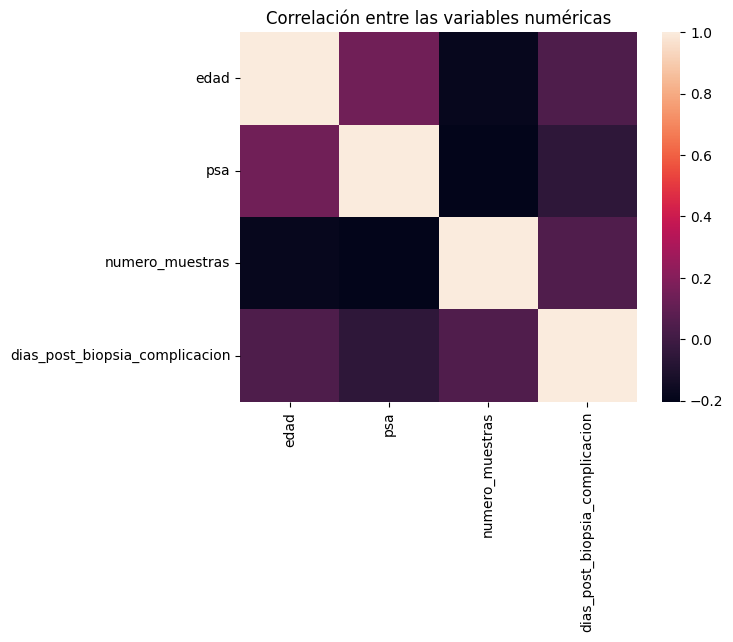

In [55]:
corr = df[numeric_cols].corr()
sns.heatmap(corr)
plt.title("Correlación entre las variables numéricas")

Text(0.5, 1.0, 'Correlación entre las variables numéricas')

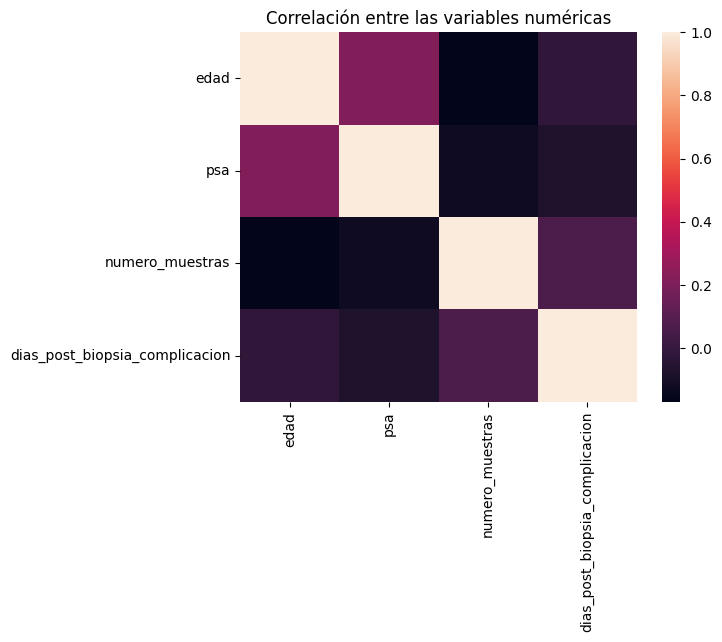

In [56]:
corr = df[numeric_cols].corr(method="kendall")
sns.heatmap(corr)
plt.title("Correlación entre las variables numéricas")

Text(0.5, 1.0, 'Correlación entre las variables numéricas')

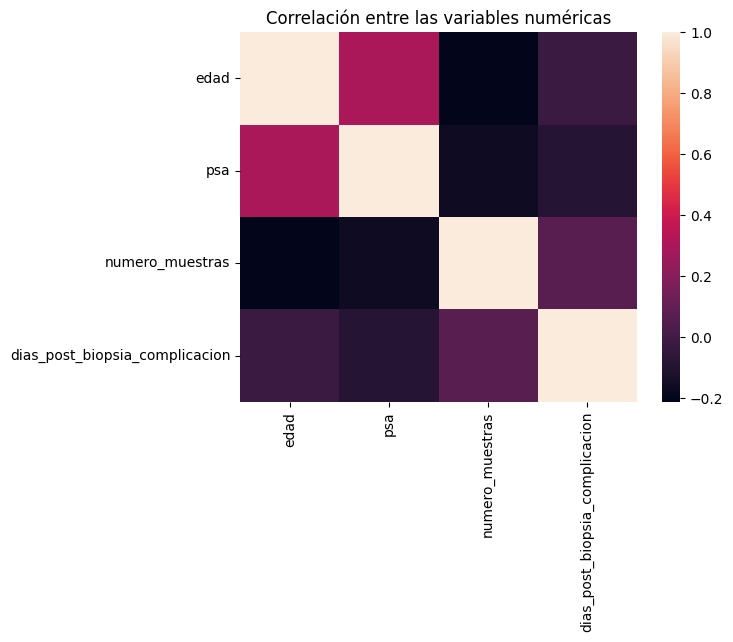

In [57]:
corr = df[numeric_cols].corr(method="spearman")
sns.heatmap(corr)
plt.title("Correlación entre las variables numéricas")

<p>Entre las variables originalmente numéricas, no parece haber alta correlación entre ellas. Ahora, se incluirán las variables transformadas a pares 1/0 para ver si se halla algo diferente.

Text(0.5, 1.0, 'Correlación entre las variables')

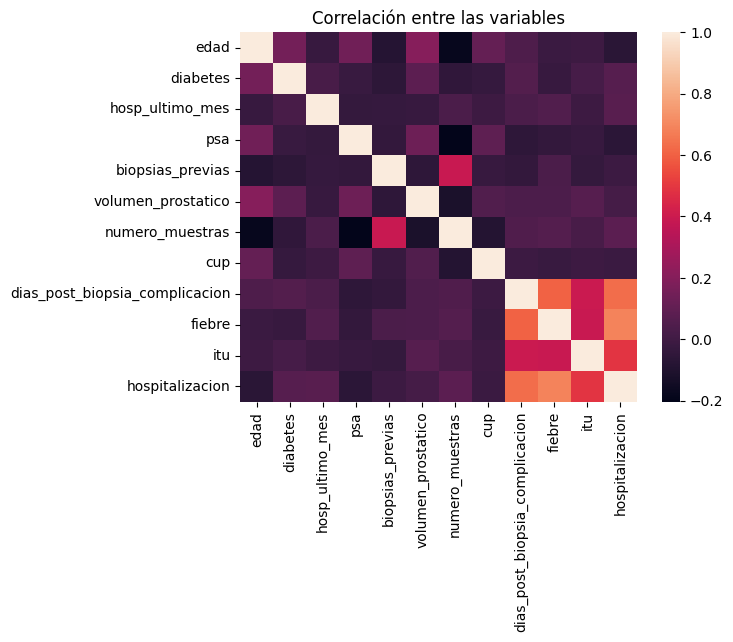

In [58]:
corr = df.select_dtypes(include="number").corr()
sns.heatmap(corr)
plt.title("Correlación entre las variables")

<p>En este caso, las variables dias_post_biopsia_complicacion, fiebre e itu (infección del tracto urinario) parecen tener alta correlación entre sí. También se destaca la correlación entre las variables biopsias_previas y numero_muestras.

In [59]:
corr

,edad,diabetes,hosp_ultimo_mes,psa,biopsias_previas,volumen_prostatico,numero_muestras,cup,dias_post_biopsia_complicacion,fiebre,itu,hospitalizacion
edad,1.000000,0.152613,-0.025223,0.144255,-0.085589,0.202642,-0.182850,0.110048,0.041509,-0.018184,-0.006114,-0.067166
diabetes,0.152613,1.000000,0.026734,-0.022996,-0.060392,0.084085,-0.049769,-0.029745,0.057819,-0.025079,0.018344,0.065159
hosp_ultimo_mes,-0.025223,0.026734,1.000000,-0.037324,-0.031167,-0.024786,0.033761,-0.007936,0.033904,0.051501,-0.009737,0.073898
psa,0.144255,-0.022996,-0.037324,1.000000,-0.040549,0.132270,-0.203371,0.089067,-0.055948,-0.039161,-0.026612,-0.065534
biopsias_previas,-0.085589,-0.060392,-0.031167,-0.040549,1.000000,-0.055474,0.389214,-0.027852,-0.042772,0.032358,-0.034172,-0.010751
volumen_prostatico,0.202642,0.084085,-0.024786,0.132270,-0.055474,1.000000,-0.116450,0.052738,0.037450,0.038422,0.064705,0.014798
numero_muestras,-0.182850,-0.049769,0.033761,-0.203371,0.389214,-0.116450,1.000000,-0.085908,0.049031,0.063973,0.026467,0.080609
cup,0.110048,-0.029745,-0.007936,0.089067,-0.027852,0.052738,-0.085908,1.000000,-0.014930,-0.022230,-0.008702,-0.017689
dias_post_biopsia_complicacion,0.041509,0.057819,0.033904,-0.055948,-0.042772,0.037450,0.049031,-0.014930,1.000000,0.604551,0.397862,0.632528
fiebre,-0.018184,-0.025079,0.051501,-0.039161,0.032358,0.038422,0.063973,-0.022230,0.604551,1.000000,0.391430,0.689312


<p>Analizando la matriz de correlación, se puede notar que las correlaciones de la columna itu con las otras dos son de cerca de 0.39, mientras que la correlación entre dias_post_biopsia_complicacion y fiebre es de 0.6. Por tanto, según la teoría conviene eliminar alguna de las dos.<p>Además, la correlación entre numero_muestras y biopsias_previas es de 0.39, por lo que no se considera necesario eliminar alguna de las dos.

In [60]:
corr[["dias_post_biopsia_complicacion", "fiebre"]].abs().sum()

dias_post_biopsia_complicacion    2.968304
fiebre                            2.976201
dtype: float64

<p>De estas dos variables, la variable fiebre parece tener, aunque por muy poco, mayor correlación con las demás variables, por tanto, se eliminará del modelo.

In [61]:
variables_eliminar = ["fiebre"]

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   edad                            568 non-null    int16  
 1   diabetes                        568 non-null    int16  
 2   hosp_ultimo_mes                 568 non-null    int16  
 3   psa                             568 non-null    float32
 4   biopsias_previas                568 non-null    int16  
 5   volumen_prostatico              568 non-null    int16  
 6   antibiotico_profilaxis          568 non-null    object 
 7   numero_muestras                 568 non-null    int16  
 8   cup                             568 non-null    int16  
 9   enfermedad_pulmonar             568 non-null    object 
 10  biopsia                         568 non-null    object 
 11  dias_post_biopsia_complicacion  568 non-null    int64  
 12  fiebre                          568 

## Análisis de los valores de las columnas

<p>A continuación se empezará a analizar estadísticamente las columnas. Se empezará analizando las columnas numéricas.

### Columnas numéricas

In [63]:
#Separar las variables almacenadas como números entre numéricas, booleanas (1/0) y la variable objetivo
numeric_cols = ["edad", "psa", "numero_muestras", "dias_post_biopsia_complicacion"]
boolean_cols = ["diabetes", "hosp_ultimo_mes", "biopsias_previas", "volumen_prostatico", "cup", "fiebre", "itu"]
objective = "hospitalizacion"

In [64]:
df[numeric_cols].describe()

,edad,psa,numero_muestras,dias_post_biopsia_complicacion
count,568.000000,568.000000,568.000000,568.000000
mean,63.882042,13.206109,12.996479,0.132042
std,9.281517,15.632869,3.921180,0.745471
min,39.000000,0.600000,4.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000
max,151.000000,100.000000,24.000000,9.000000


<ipython-input-65-6d6f6b496353>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[c], color="g")


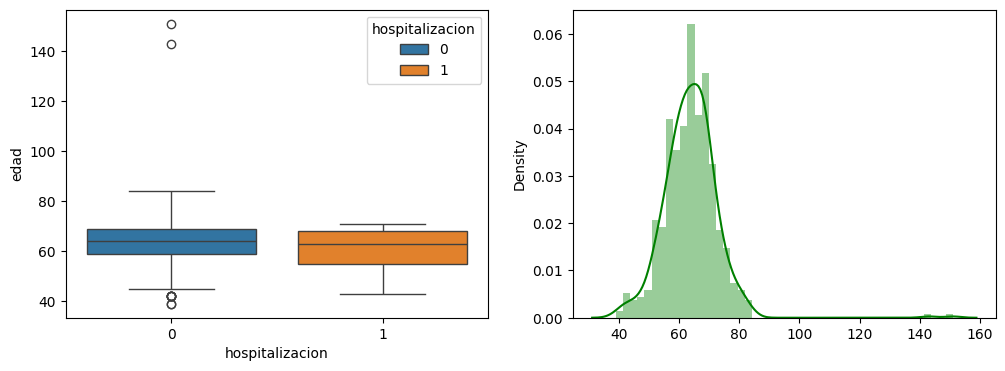

<ipython-input-65-6d6f6b496353>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[c], color="g")


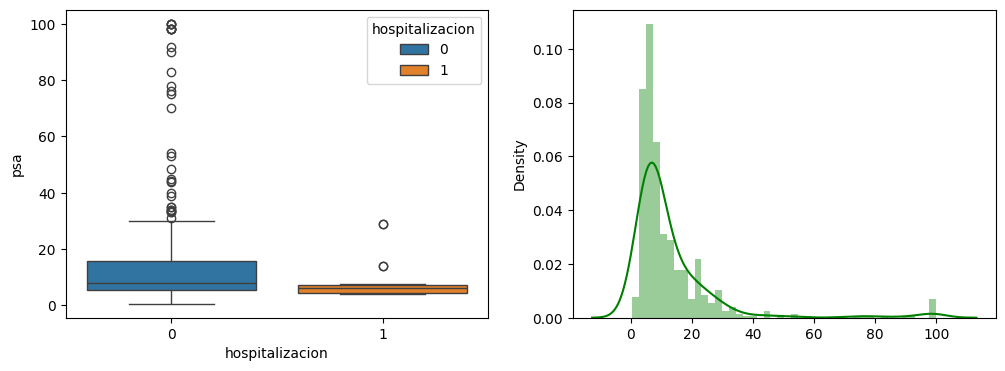

<ipython-input-65-6d6f6b496353>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[c], color="g")


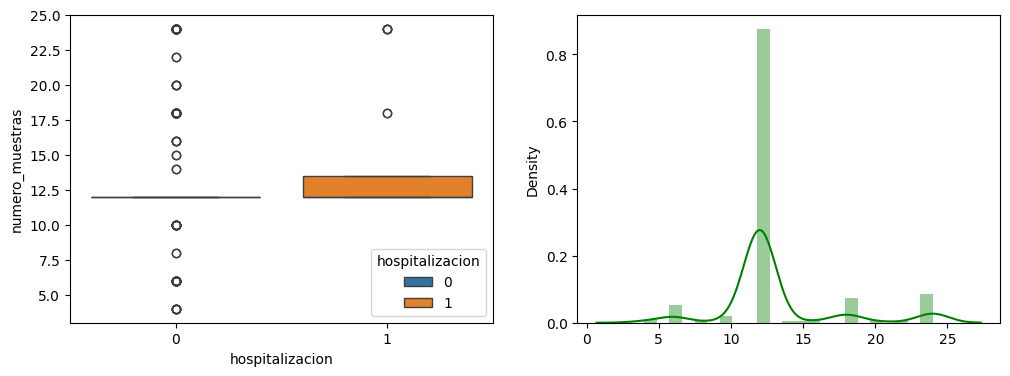

<ipython-input-65-6d6f6b496353>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[c], color="g")


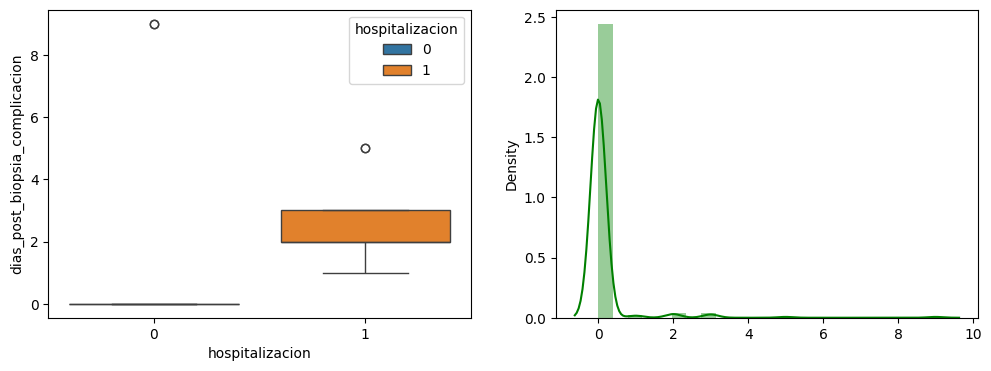

In [65]:
for c in numeric_cols:
  plt.figure(figsize=(12,4))
  plt.subplot(1,2,1)
  sns.boxplot(x=objective, y=c, hue=objective, data=df)
  plt.subplot(1,2,2)
  sns.distplot(x=df[c], color="g")
  plt.show()

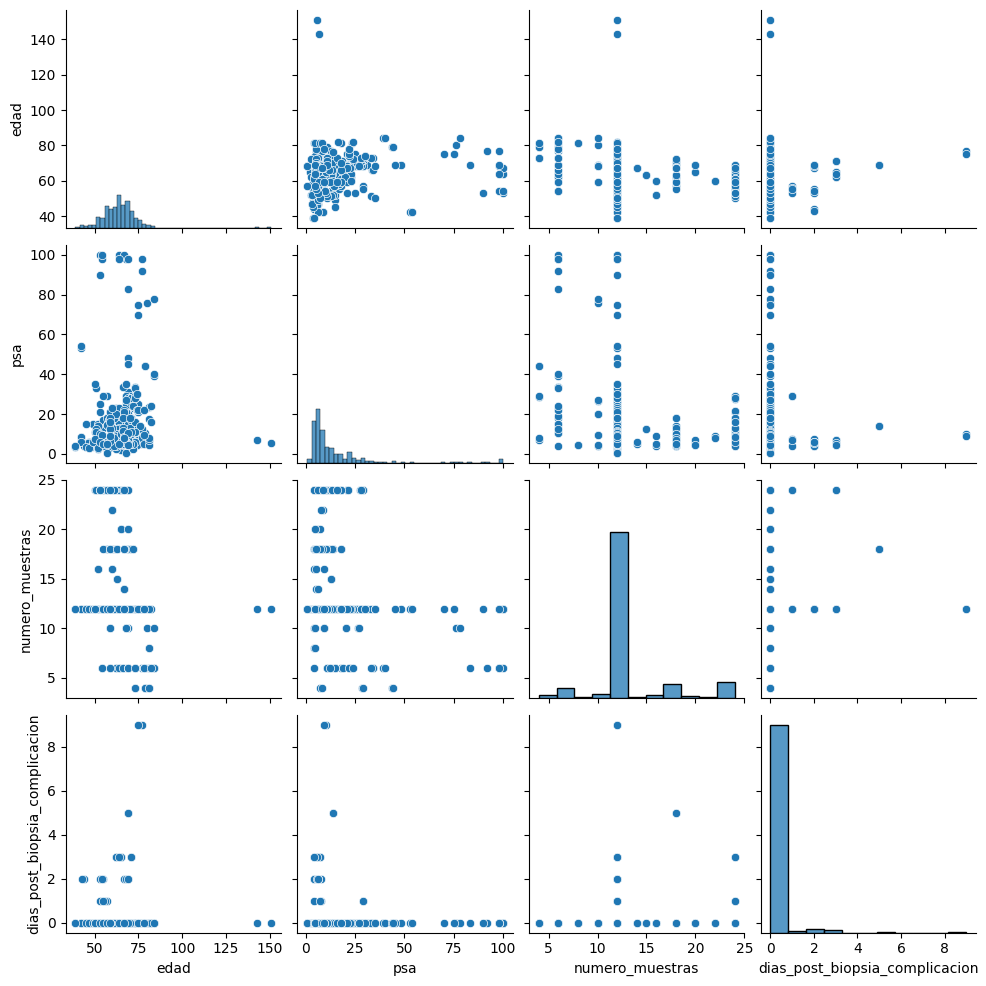

In [66]:
sns.pairplot(data=df[numeric_cols])

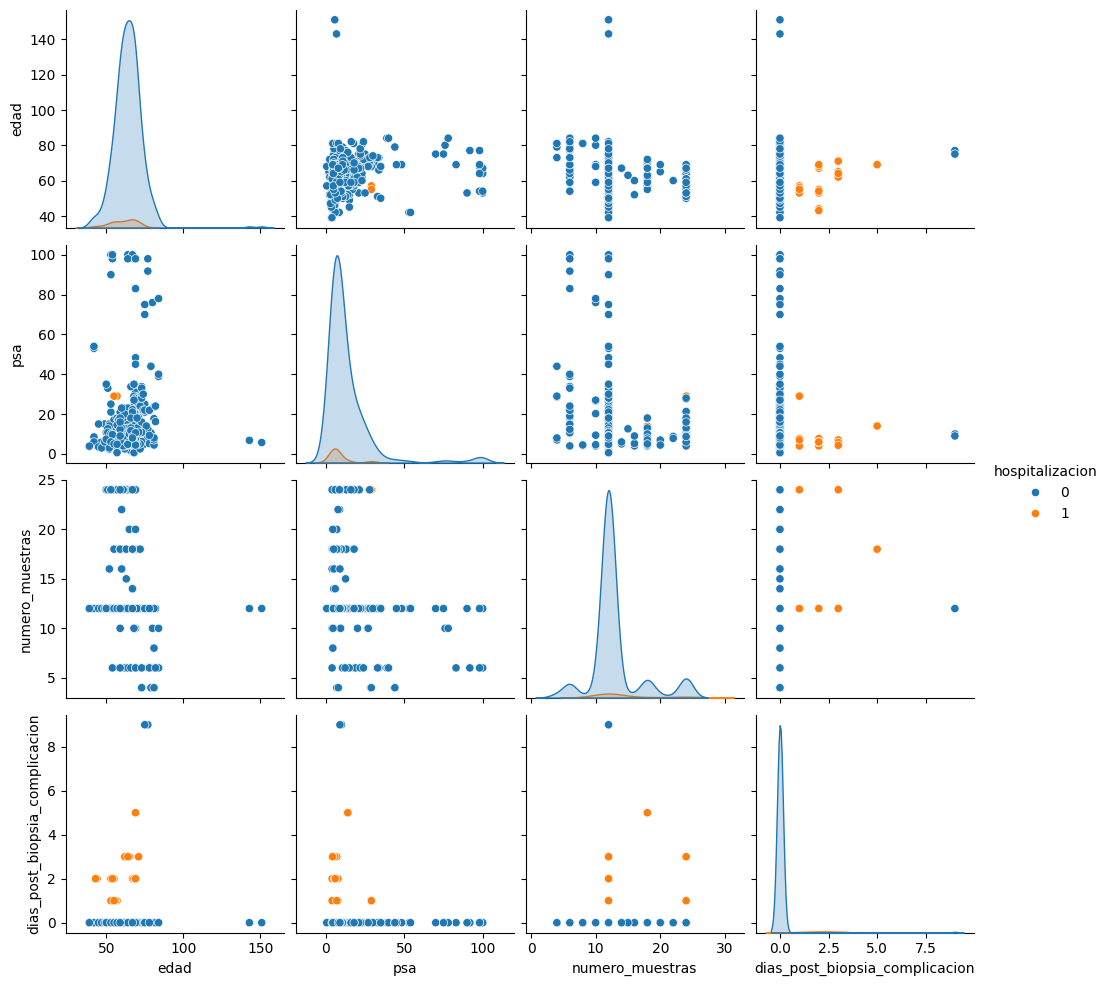

In [67]:
sns.pairplot(data=df, vars=numeric_cols, hue=objective)

<p>Algunos puntos a destacar:

*   En general, la edad parece estar en el rango entre 40 y cerca de 85 años, pero hay outliers con más de 140 años. Dado que esto es altamente improbable, se decidió corregir estos valores restándoles 100 años.
*   Para la variable psa, se observa mayor variación de los valores en el caso de no hospitalización que en el caso de hospitalización.
*   El boxplot para numero_muestras sin hospitalización están en 12 muestras, con unos pocos casos con más o menos muestras. Por otra parte, para numero_muestras con hospitalización está entre 12 y 14, también con unas pocas variaciones.
*   La variable dias_post_biopsia_complicacion para el caso de no hospitalización se distribuye en su totalidad en el valor cero, excepto para algún outlier con más de 8. Dada la distribución de valores en este caso, puede considerarse un error de entrada, por lo que se decidió corregir este valor como cero.




In [68]:
#Corrección de edades
df.edad = df.edad.apply(lambda x: x-100 if x > 140 else x)
#Corrección de dias_post_biopsia_complicacion
df.dias_post_biopsia_complicacion = df.dias_post_biopsia_complicacion.apply(lambda x: 0 if x > 8 else x)

### Columnas categóricas

A continuación se revisará la distribución de las variables categoricas

In [69]:
df.describe(include="object")

,antibiotico_profilaxis,enfermedad_pulmonar,biopsia,tipo_cultivo,agente_aislado,patron_resistencia
count,568,568,568,568,568,568
unique,5,4,11,4,3,5
top,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NEG,NO,NO,NO
freq,448,548,322,560,560,561


   hospitalizacion  diabetes  count  porcentaje
0                0         0    486    0.855634
1                0         1     58    0.102113
2                1         0     19    0.033451
3                1         1      5    0.008803


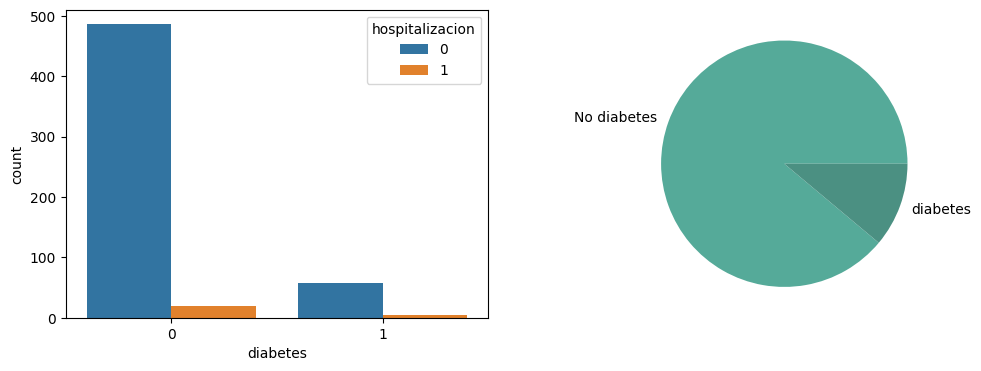

   hospitalizacion  hosp_ultimo_mes  count  porcentaje
0                0                0    540    0.950704
1                1                0     23    0.040493
2                0                1      4    0.007042
3                1                1      1    0.001761


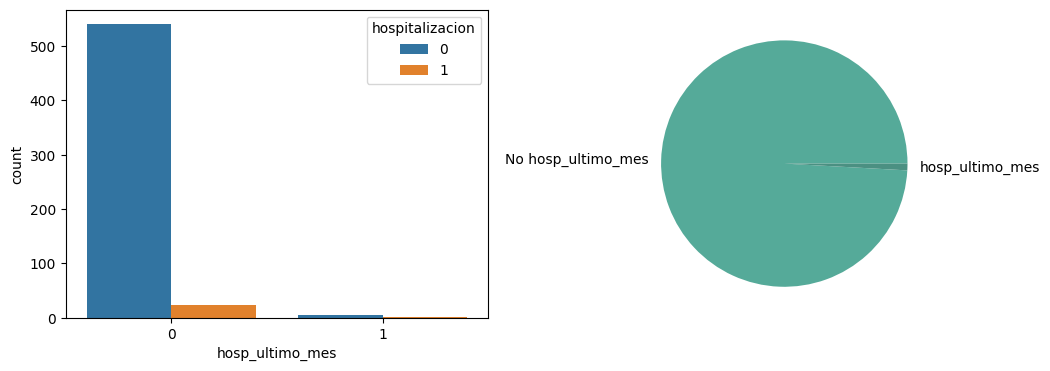

   hospitalizacion  biopsias_previas  count  porcentaje
0                0                 0    490    0.862676
1                0                 1     54    0.095070
2                1                 0     22    0.038732
3                1                 1      2    0.003521


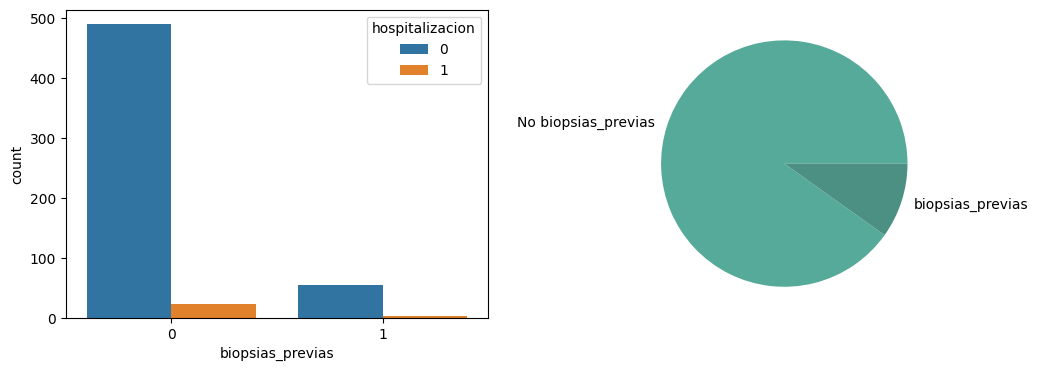

   hospitalizacion  volumen_prostatico  count  porcentaje
0                0                   1    390    0.686620
1                0                   0    154    0.271127
2                1                   1     18    0.031690
3                1                   0      6    0.010563


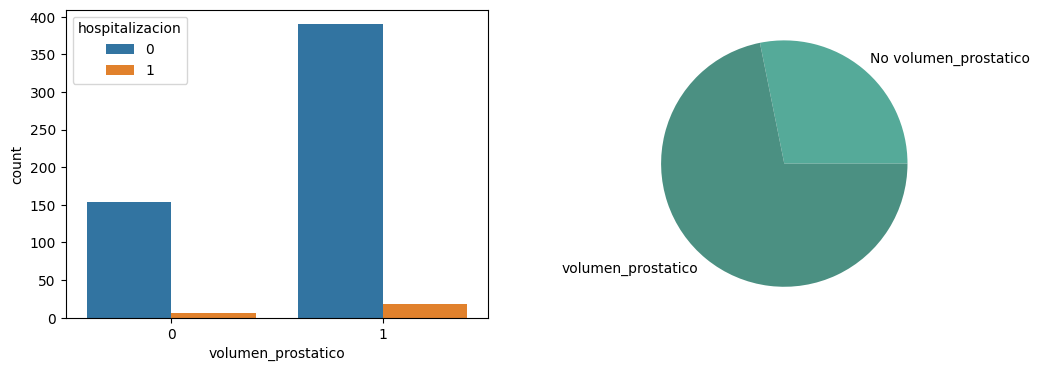

   hospitalizacion  cup  count  porcentaje
0                0    0    540    0.950704
1                1    0     24    0.042254
2                0    1      4    0.007042


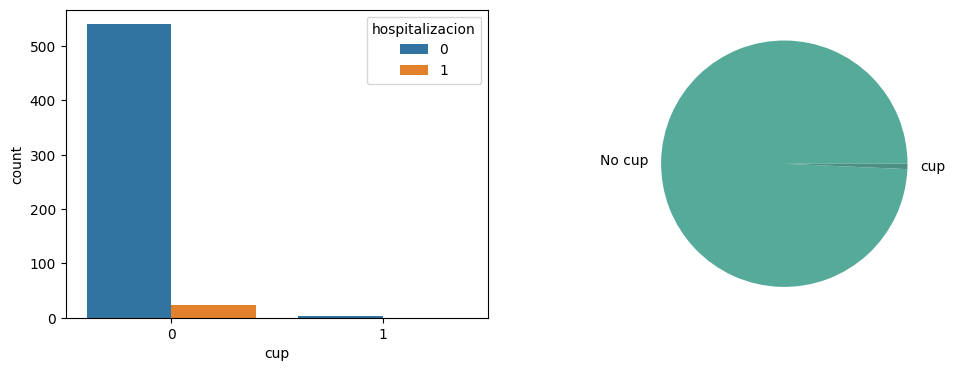

   hospitalizacion  fiebre  count  porcentaje
0                0       0    528    0.929577
1                1       1     21    0.036972
2                0       1     16    0.028169
3                1       0      3    0.005282


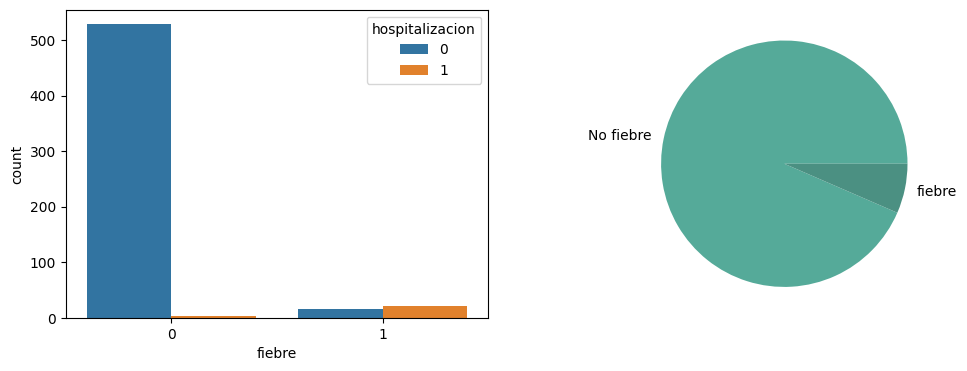

   hospitalizacion  itu  count  porcentaje
0                0    0    544    0.957746
1                1    0     18    0.031690
2                1    1      6    0.010563


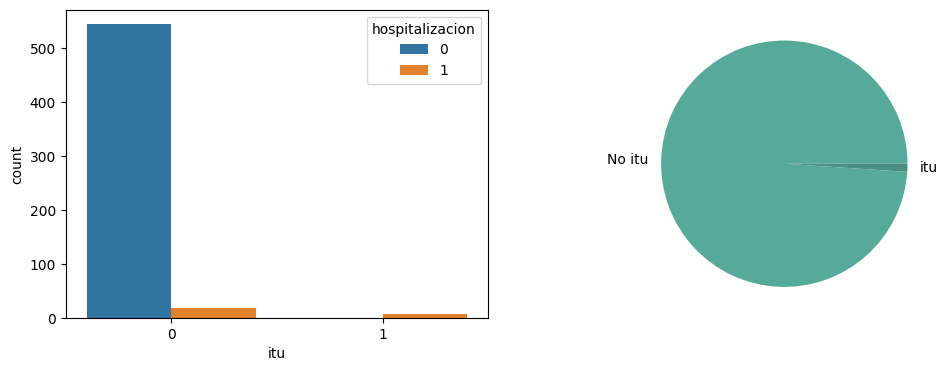

   hospitalizacion          antibiotico_profilaxis  count
0                0  FLUOROQUINOLONA_AMINOGLICOSIDO    428
1                0    CEFALOSPORINA_AMINOGLUCOCIDO     54
2                0                           OTROS     42
3                1  FLUOROQUINOLONA_AMINOGLICOSIDO     20
4                0                   OROQUINOLONAS     16
5                0  FLUOROQUINOLONA_AMINOGLICÓSIDO      4
6                1    CEFALOSPORINA_AMINOGLUCOCIDO      2
7                1                   OROQUINOLONAS      2


<Figure size 640x480 with 0 Axes>

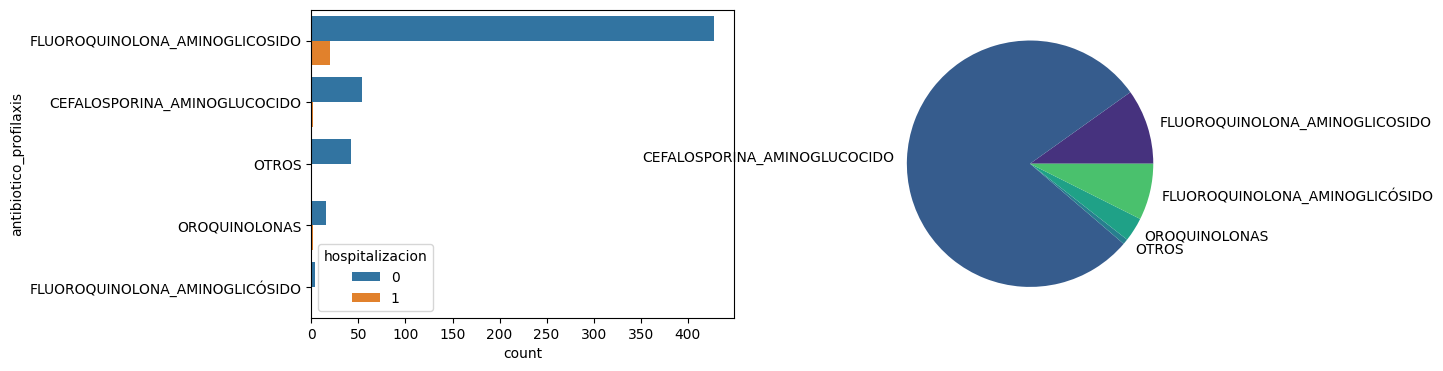

   hospitalizacion enfermedad_pulmonar  count
0                0                  NO    524
1                1                  NO     24
2                0                  SI     12
3                0            SI, ASMA      4
4                0            SI, EPOC      4


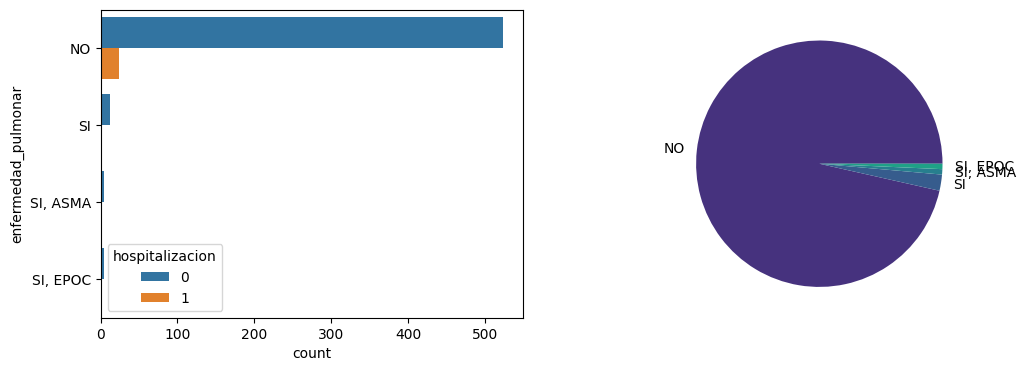

    hospitalizacion                                     biopsia  count
0                 0                                         NEG    302
1                 0                   ADENOCARCINOMA GLEASON 7     104
2                 0                   ADENOCARCINOMA GLEASON 6      36
3                 0                   ADENOCARCINOMA GLEASON 8      22
4                 0                   ADENOCARCINOMA GLEASON 9      20
5                 1                                         NEG     20
6                 0                    ADENOCARCINOMA GLEASON 6     16
7                 0                      HIPERPLASIA PROSTATICA     14
8                 0                                 PROSTATITIS     14
9                 0                    ADENOCARCINOMA GLEASON 7     10
10                0                  ADENOCARCINOMA GLEASON 10       4
11                0  CARCINOMA INDIFERENCIADO DE CELULAS CLARAS      2
12                1                   ADENOCARCINOMA GLEASON 6       2
13    

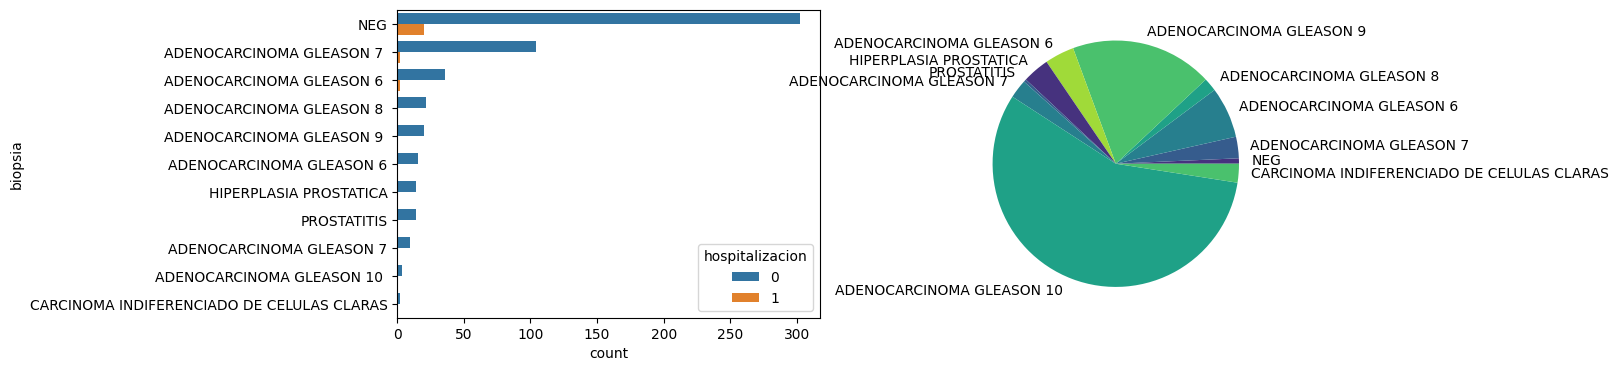

   hospitalizacion              tipo_cultivo  count
0                0                        NO    544
1                1                        NO     16
2                1                UROCULTIVO      4
3                1  HEMOCULTIVO Y UROCULTIVO      2
4                1               HEMOCULTIVO      2


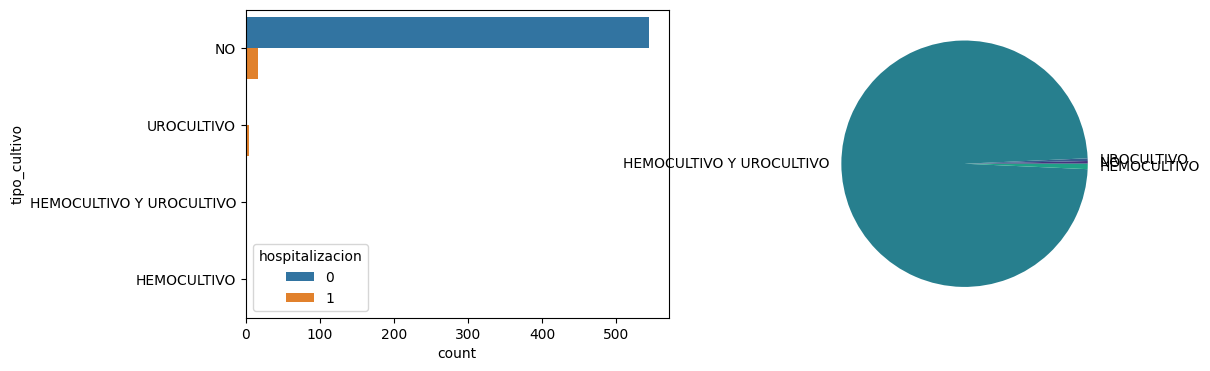

   hospitalizacion          agente_aislado  count
0                0                      NO    544
1                1                      NO     16
2                1                  E.COLI      6
3                1  PSEUDOMONAS AERUGINOSA      2


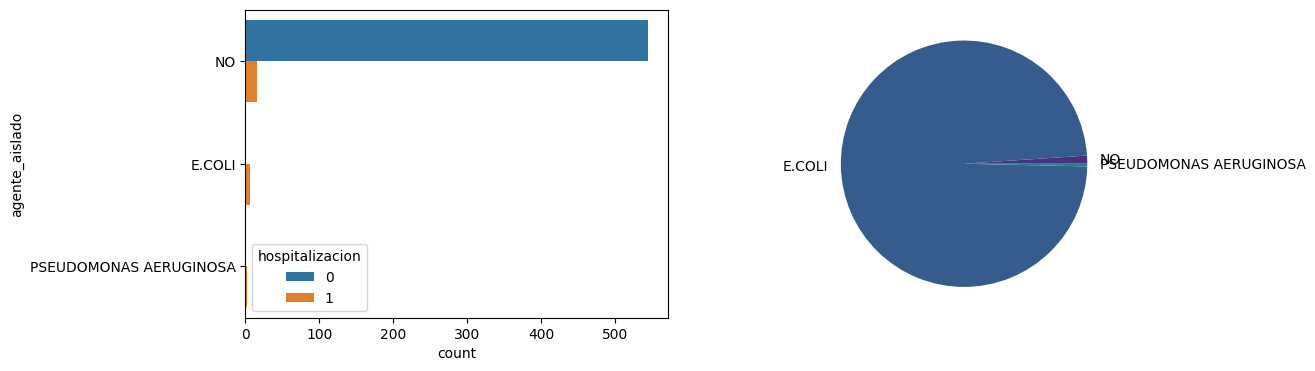

   hospitalizacion                                 patron_resistencia  count
0                0                                                 NO    544
1                1                                                 NO     17
2                1                   RESISTENTE A AMPI, CIPRO Y GENTA      2
3                1                                     MULTI SENSIBLE      2
4                1  RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROX...      2
5                1                AMPI R, CIPRO R, GENTA R, SULFA M R      1


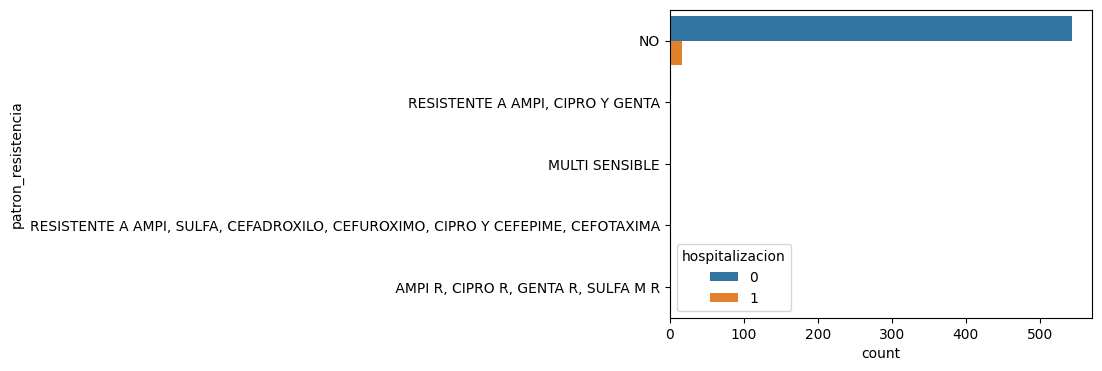

In [70]:
for c in boolean_cols:
  counts = df[[objective,c]].value_counts().to_frame()
  counts.reset_index(inplace=True)
  counts["porcentaje"] = counts["count"]/shape
  print(counts)
  #Grafico de barras
  plt.figure(figsize=(12,4))
  plt.subplot(1,2,1)
  sns.barplot(data=counts, hue="hospitalizacion", x=c, y="count")
  #Grafico de torta con la variable analizada
  plt.subplot(1,2,2)
  plt.pie(pd.DataFrame(counts.groupby(c).sum()).porcentaje, labels=[f"No {c}", c], colors=sns.color_palette("dark:#5A9_r", as_cmap=False))
  plt.show()

colormap = plt.get_cmap("cool")
plt.set_cmap(colormap)
for c in list(df.select_dtypes(include="object").columns):
  counts = df[[objective,c]].value_counts().to_frame()
  counts.reset_index(inplace=True)
  print(counts)
  counts["porcentaje"] = counts["count"]/shape
  #Grafico de barras
  plt.figure(figsize=(12,4))
  plt.subplot(1,2,1)
  sns.barplot(data=counts, hue="hospitalizacion", y=c, x="count")
  if c == "patron_resistencia": continue
  #Grafico de torta con la variable analizada
  plt.subplot(1,2,2)
  plt.pie(pd.DataFrame(counts.groupby(c).sum()).porcentaje, labels=counts[c].unique(), colors=sns.color_palette("viridis"))
  plt.show()

En todas las categorías se observa la predilección de una sobre las demás. Esto puede deberse a desbalanceo en la variable objetivo.

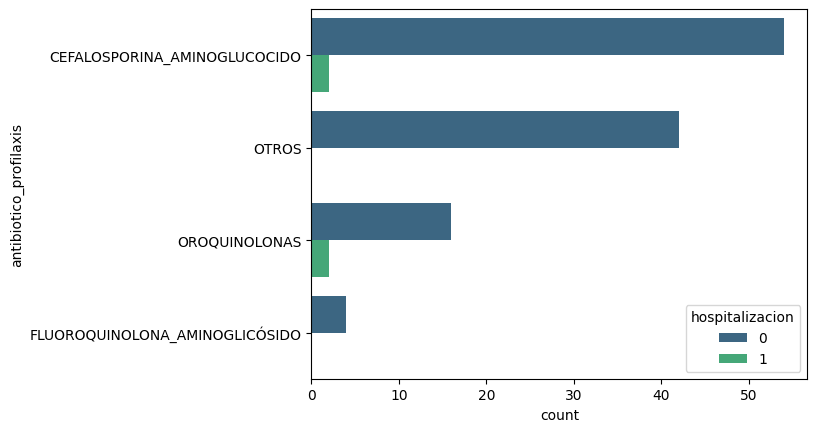

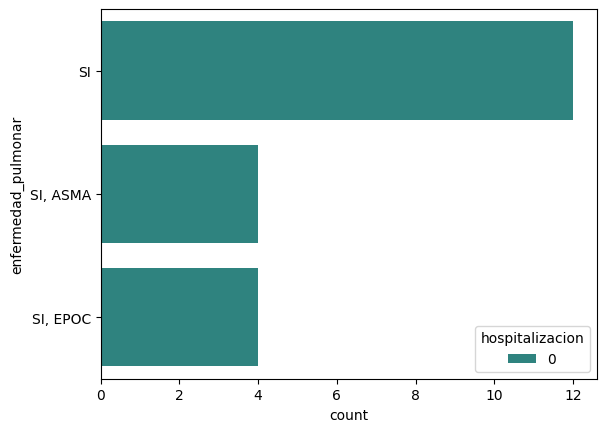

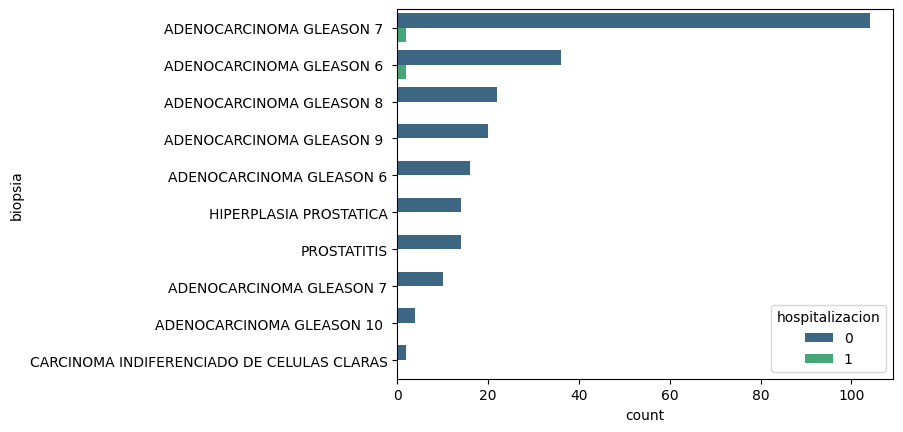

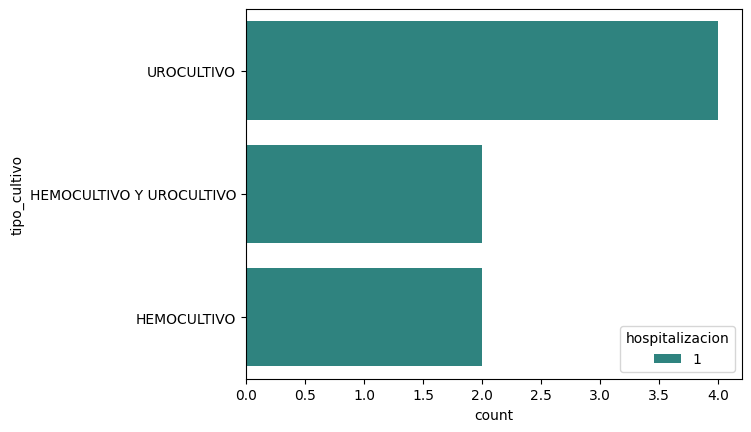

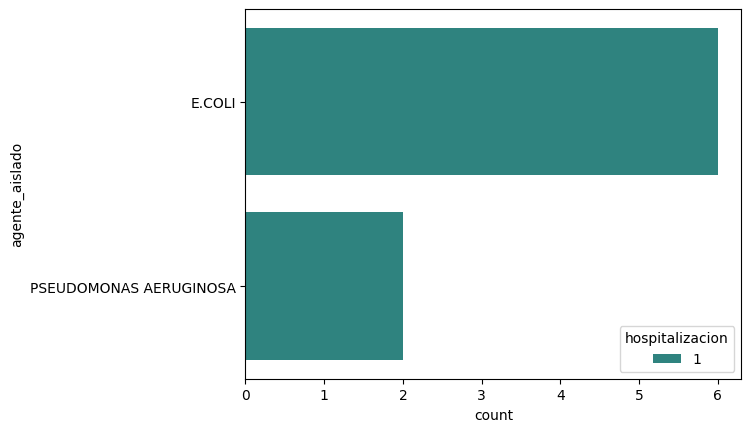

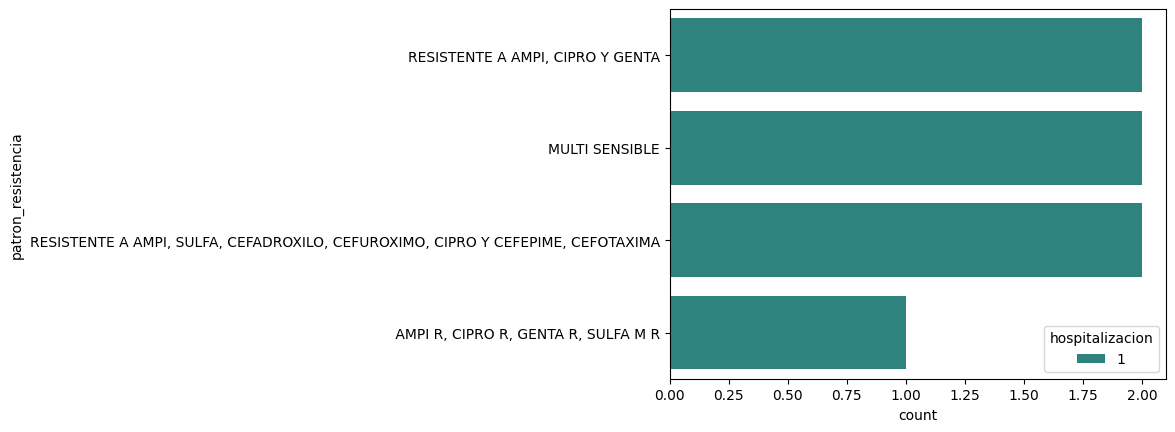

In [71]:
#Ver en mejor detalle  las categorías excluyendo el valor "NO", altamente predominante
for c in list(df.select_dtypes(include="object").columns):
  counts = df[[objective,c]].value_counts().to_frame()
  counts.reset_index(inplace=True)
  counts.drop(counts[counts[c] == "NO"].index, inplace=True)
  #Excluir de biopsia
  counts.drop(counts[counts[c] == "NEG"].index, inplace=True)
  #Excluir de antibiotico_profilaxis
  counts.drop(counts[counts[c] == "FLUOROQUINOLONA_AMINOGLICOSIDO"].index, inplace=True)
  sns.barplot(data=counts, hue=objective, y=c, x="count", palette="viridis")
  plt.show()

Se encontró que se deben normalizar los valores en antibiotico_profilaxis, ya que hay un valor escrito de dos formas diferentes.

In [72]:
df.antibiotico_profilaxis.replace("FLUOROQUINOLONA_AMINOGLICÓSIDO", "FLUOROQUINOLONA_AMINOGLICOSIDO", inplace=True)
df.antibiotico_profilaxis.unique()

array(['FLUOROQUINOLONA_AMINOGLICOSIDO', 'CEFALOSPORINA_AMINOGLUCOCIDO',
       'OROQUINOLONAS', 'OTROS'], dtype=object)

# 2. Preparación de los Datos

<p>En general, parece que las variables categóricas son bastante uniformes, variando en muy pocos casos. Aunque esto es de esperar dadas las características de los datos médicos, es probable que esto afecte el desempeño del modelo a construir. Por tanto, se propone probar el desempeño de los modelos con y sin las variables categóricas, para evaluar cuál se adapta y generaliza mejor. Además, es casi seguro que se necesitará sobremuestrear una  categoría, dado que (como se aprecia en las siguientes imágenes) la variable objetivo está fuertemente desbalanceada, y los datos disponibles son relativamente pocos.

In [73]:
counts = df[objective].value_counts().to_frame().reset_index()
counts.rename({"index":"hospitalizacion", "hospitalizacion":"valor"}, axis="columns", inplace=True)
counts

,valor,count
0,0,544
1,1,24


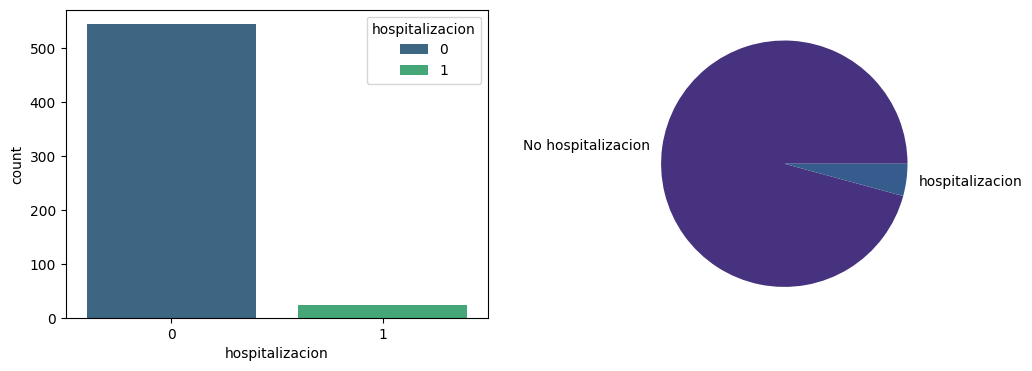

In [74]:
counts = df[objective].value_counts().to_frame().reset_index()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(data=counts, y="count", x="hospitalizacion", hue="hospitalizacion", palette="viridis")
#Grafico de torta con la variable analizada
plt.subplot(1,2,2)
plt.pie(data=counts, x="count", labels=[f"No {objective}", objective], colors=sns.color_palette("viridis", as_cmap=False))
plt.show()

## Normalización de variables numéricas

<p>Como se muestra a continuación, las variables numéricas tienen escalas de valores bastante diferentes, y considerando que varias de las mismas contienen outliers, se considera aplicar el RobustScaler.

In [75]:
df[numeric_cols].describe()

,edad,psa,numero_muestras,dias_post_biopsia_complicacion
count,568.000000,568.000000,568.000000,568.000000
mean,63.529930,13.206109,12.996479,0.100352
std,7.915726,15.632869,3.921180,0.526678
min,39.000000,0.600000,4.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000
max,84.000000,100.000000,24.000000,5.000000


## Selección y codificación de variables

**Selección de variables**
<p>Se considera utilizar SelectKBest para evaluar la mejor combinación de parámetros. Dado que el dataset contiene variables tanto categóricas como numéricas, se va a utilizar mutual_info_classif para la selección de características.</p>

**Codificación de variables**
<p>En cuanto a las variables categóricas, se utilizará codificación OneHot, eliminando las variables relacionadas a "No", "Neg" y "Otros" para evitar la redundancia. Siguiendo las prácticas recomendadas, se hace la codificación antes del escalado, el sobremuestreo y la selección de variables.

In [76]:
cat_cols = df.select_dtypes(include="object").columns
cat_cols

Index(['antibiotico_profilaxis', 'enfermedad_pulmonar', 'biopsia',
       'tipo_cultivo', 'agente_aislado', 'patron_resistencia'],
      dtype='object')

In [77]:
for c in cat_cols:
  print(df[c].unique())

['FLUOROQUINOLONA_AMINOGLICOSIDO' 'CEFALOSPORINA_AMINOGLUCOCIDO'
 'OROQUINOLONAS' 'OTROS']
['NO' 'SI, EPOC' 'SI, ASMA' 'SI']
['NEG' 'ADENOCARCINOMA GLEASON 6 ' 'ADENOCARCINOMA GLEASON 7 '
 'ADENOCARCINOMA GLEASON 6' 'ADENOCARCINOMA GLEASON 10 '
 'ADENOCARCINOMA GLEASON 9 ' 'ADENOCARCINOMA GLEASON 8 ' 'PROSTATITIS'
 'HIPERPLASIA PROSTATICA' 'ADENOCARCINOMA GLEASON 7'
 'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS']
['NO' 'HEMOCULTIVO' 'UROCULTIVO' 'HEMOCULTIVO Y UROCULTIVO']
['NO' 'E.COLI' 'PSEUDOMONAS AERUGINOSA']
['NO' ' AMPI R, CIPRO R, GENTA R, SULFA M R'
 'RESISTENTE A AMPI, CIPRO Y GENTA'
 'RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA'
 'MULTI SENSIBLE']


In [78]:
dummies = pd.get_dummies(df[cat_cols])
dummies.drop(["enfermedad_pulmonar_NO", "antibiotico_profilaxis_OTROS", "biopsia_NEG", "tipo_cultivo_NO", "agente_aislado_NO", "patron_resistencia_NO"], axis="columns", inplace=True)
dummies

,antibiotico_profilaxis_CEFALOSPORINA_AMINOGLUCOCIDO,antibiotico_profilaxis_FLUOROQUINOLONA_AMINOGLICOSIDO,antibiotico_profilaxis_OROQUINOLONAS,enfermedad_pulmonar_SI,"enfermedad_pulmonar_SI, ASMA","enfermedad_pulmonar_SI, EPOC",biopsia_ADENOCARCINOMA GLEASON 10,biopsia_ADENOCARCINOMA GLEASON 6,biopsia_ADENOCARCINOMA GLEASON 6,biopsia_ADENOCARCINOMA GLEASON 7,...,biopsia_PROSTATITIS,tipo_cultivo_HEMOCULTIVO,tipo_cultivo_HEMOCULTIVO Y UROCULTIVO,tipo_cultivo_UROCULTIVO,agente_aislado_E.COLI,agente_aislado_PSEUDOMONAS AERUGINOSA,"patron_resistencia_ AMPI R, CIPRO R, GENTA R, SULFA M R",patron_resistencia_MULTI SENSIBLE,"patron_resistencia_RESISTENTE A AMPI, CIPRO Y GENTA","patron_resistencia_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA"
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [79]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 25 columns):
 #   Column                                                                                              Non-Null Count  Dtype
---  ------                                                                                              --------------  -----
 0   antibiotico_profilaxis_CEFALOSPORINA_AMINOGLUCOCIDO                                                 568 non-null    bool 
 1   antibiotico_profilaxis_FLUOROQUINOLONA_AMINOGLICOSIDO                                               568 non-null    bool 
 2   antibiotico_profilaxis_OROQUINOLONAS                                                                568 non-null    bool 
 3   enfermedad_pulmonar_SI                                                                              568 non-null    bool 
 4   enfermedad_pulmonar_SI, ASMA                                                                        568 non-null    bool 
 5   e

In [80]:
df = pd.concat([df, dummies], axis = 1)
df.drop(columns=cat_cols, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 37 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   edad                                                                                                568 non-null    int64  
 1   diabetes                                                                                            568 non-null    int16  
 2   hosp_ultimo_mes                                                                                     568 non-null    int16  
 3   psa                                                                                                 568 non-null    float32
 4   biopsias_previas                                                                                    568 non-null    

## Guardar dataframe con las modificaciones

In [81]:
df.to_csv("Hospitalizacion.csv", sep=";", float_format=".", index=False)

# 3. Entrenamiento del Modelo

## Modelos a probar

<p>Los siguientes modelos se probarán utilizando una grid search:

*   Regresión Logística
*   Perceptrón Simple
*   Árbol de Decisión
*   Bosque Aleatorio
*   Máquina de Vectores de Soporte
*   K-Nearest Neighbors
*   Clasificador Naive Bayes Gaussiano

In [82]:
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

model_params = {
    #Probar modelos de regresión logística con penalidades L1, L2, Red Elástica o ninguna
    "Regresión Logística":{"model":LogisticRegression(), "params":{
        "penalty":["l1","l2"],
        "solver":["liblinear"],
        "random_state":[42]
    }},
    #Probar modelos de perceptrón simple con penalidades L1, L2, Red Elástica o ninguna
    "Perceptrón":{"model":Perceptron(), "params":{
        "penalty":["l1","l2","elasticnet",None],
        "random_state":[42]
    }},
    #Probar modelos de árbol de decisión con profundidades del 1 al 10
    "Árbol de Decisión":{"model":DecisionTreeClassifier(), "params":{
        "max_depth":range(2,11),
        "random_state":[42]
    }},
    #Probar modelos de bosques con profundidades del 1 al 10 y número de estimadores del 10 al 100 con salto de 10
    "Random Forest":{"model":RandomForestClassifier(), "params":{
        "max_depth":range(2,11),
        "n_estimators":range(10, 101, 10),
        "random_state":[42]
    }},
    #Provar SVM con kernels linear, poly, rbf y sigmoide; valor C de 0.01, 0.1, 0.5, 1 y 10 y gamma de 0.01, 0.5, 1 y 10
    "SVM (SVC)":{"model":SVC(), "params":{
        "kernel":["linear","poly","rbf","sigmoid"],
        "C":[0.01,0.1,0.5,1,10],
        "gamma":[0.01,0.5,1,10],
        "random_state":[42]
    }},
    #Probar KNN con número de vecinos de 1 a 15
    "K-Nearest Neighbors":{"model":KNeighborsClassifier(), "params":{
        "n_neighbors":range(3,16)
    }},
    "Gaussian Naive Bayes":{"model":GaussianNB(), "params":{}}
}

## División entre conjunto de entrenamiento y de prueba

In [83]:
from sklearn.model_selection import train_test_split

X = df.drop(objective, axis="columns")
y = df[objective]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape:  (454, 36)
y_train shape:  (454,)
X_test shape: (114, 36)
y_test shape: (114,)


In [84]:
X_train

,edad,diabetes,hosp_ultimo_mes,psa,biopsias_previas,volumen_prostatico,numero_muestras,cup,dias_post_biopsia_complicacion,fiebre,...,biopsia_PROSTATITIS,tipo_cultivo_HEMOCULTIVO,tipo_cultivo_HEMOCULTIVO Y UROCULTIVO,tipo_cultivo_UROCULTIVO,agente_aislado_E.COLI,agente_aislado_PSEUDOMONAS AERUGINOSA,"patron_resistencia_ AMPI R, CIPRO R, GENTA R, SULFA M R",patron_resistencia_MULTI SENSIBLE,"patron_resistencia_RESISTENTE A AMPI, CIPRO Y GENTA","patron_resistencia_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA"
248,57,0,0,14.500000,0,1,12,0,0,0,...,True,False,False,False,False,False,False,False,False,False
88,64,0,0,8.390000,0,1,12,0,0,0,...,False,False,False,False,False,False,False,False,False,False
334,70,0,0,10.600000,0,1,12,0,0,0,...,False,False,False,False,False,False,False,False,False,False
362,60,0,0,5.970000,0,0,12,0,0,0,...,False,False,False,False,False,False,False,False,False,False
33,63,0,0,10.500000,0,0,12,0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,53,0,0,4.600000,0,1,12,0,0,0,...,False,False,False,False,False,False,False,False,False,False
106,65,0,0,5.970000,0,1,20,0,0,0,...,False,False,False,False,False,False,False,False,False,False
270,51,0,0,33.000000,0,0,12,0,0,0,...,False,False,False,False,False,False,False,False,False,False
435,69,0,0,20.200001,0,1,10,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [85]:
#Precisión base del modelo
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", acc_baseline)

Baseline Accuracy: 0.9581497797356828


## Oversampling

In [86]:
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over

(870, 36)


,edad,diabetes,hosp_ultimo_mes,psa,biopsias_previas,volumen_prostatico,numero_muestras,cup,dias_post_biopsia_complicacion,fiebre,...,biopsia_PROSTATITIS,tipo_cultivo_HEMOCULTIVO,tipo_cultivo_HEMOCULTIVO Y UROCULTIVO,tipo_cultivo_UROCULTIVO,agente_aislado_E.COLI,agente_aislado_PSEUDOMONAS AERUGINOSA,"patron_resistencia_ AMPI R, CIPRO R, GENTA R, SULFA M R",patron_resistencia_MULTI SENSIBLE,"patron_resistencia_RESISTENTE A AMPI, CIPRO Y GENTA","patron_resistencia_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA"
0,57,0,0,14.50,0,1,12,0,0,0,...,True,False,False,False,False,False,False,False,False,False
1,64,0,0,8.39,0,1,12,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,70,0,0,10.60,0,1,12,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,60,0,0,5.97,0,0,12,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,63,0,0,10.50,0,0,12,0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,69,0,0,14.00,0,1,18,0,5,1,...,False,False,False,True,False,True,False,True,False,False
866,65,1,0,5.19,0,1,24,0,3,1,...,False,False,False,False,False,False,False,False,False,False
867,68,0,0,6.20,0,1,12,0,2,1,...,False,False,True,False,True,False,False,False,False,True
868,64,1,0,5.70,0,1,24,0,3,0,...,False,False,False,False,False,False,False,False,False,False


## Escalado con RobustScaler

In [87]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler().fit(X_train_over)
X_train_esc = pd.DataFrame(scaler.transform(X_train_over), columns=X_train_over.columns)
X_test_esc = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train_esc

,edad,diabetes,hosp_ultimo_mes,psa,biopsias_previas,volumen_prostatico,numero_muestras,cup,dias_post_biopsia_complicacion,fiebre,...,biopsia_PROSTATITIS,tipo_cultivo_HEMOCULTIVO,tipo_cultivo_HEMOCULTIVO Y UROCULTIVO,tipo_cultivo_UROCULTIVO,agente_aislado_E.COLI,agente_aislado_PSEUDOMONAS AERUGINOSA,"patron_resistencia_ AMPI R, CIPRO R, GENTA R, SULFA M R",patron_resistencia_MULTI SENSIBLE,"patron_resistencia_RESISTENTE A AMPI, CIPRO Y GENTA","patron_resistencia_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA"
0,-0.666667,0.0,0.0,1.118222,0.0,0.0,0.0,0.0,-0.25,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.083333,0.0,0.0,0.295049,0.0,0.0,0.0,0.0,-0.25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.416667,0.0,0.0,0.592792,0.0,0.0,0.0,0.0,-0.25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.416667,0.0,0.0,-0.030987,0.0,-1.0,0.0,0.0,-0.25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.166667,0.0,0.0,0.579320,0.0,-1.0,0.0,0.0,-0.25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,0.333333,0.0,0.0,1.050859,0.0,0.0,6.0,0.0,2.25,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
866,0.000000,1.0,0.0,-0.136073,0.0,0.0,12.0,0.0,1.25,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
867,0.250000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.75,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
868,-0.083333,1.0,0.0,-0.067363,0.0,0.0,12.0,0.0,1.25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Pipeline con Selector de características y el modelo dentro de un Grid Search

<p>Por simpleza, se utilizará cv = 5 y score="f1" en el grid, es decir, se buscará optimizar la métrica F1 con 5 folds para la validación cruzada.



In [88]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import GridSearchCV

mejores_modelos = {}

for k in [2, 3, 5, 10, 15, "all"]:
  selector = SelectKBest(k=k, score_func=mutual_info_classif)
  X_selected = selector.fit_transform(X_train_esc, y_train_over)
  for i, j in model_params.items():
    print(f"Modelo: {i}; columnas: {k}")
    grid = GridSearchCV(j["model"], param_grid=j["params"], scoring="f1", cv=5).fit(X_selected, y_train_over)
    print(f"Modelo: {i}, número de variables seleccionadas: {k}")
    results = pd.DataFrame(grid.cv_results_)
    print(results)
    print(f"Mejores parámetros: {grid.best_params_}")
    print(f"Mejor puntaje: {grid.best_score_}")
    score = grid.score(selector.transform(X_test_esc), y_test)
    print(f"Puntaje test: {score}")
    mejores_modelos[(i, k)] = [grid, grid.best_params_, grid.best_score_, score]

Modelo: Regresión Logística; columnas: 2
Modelo: Regresión Logística, número de variables seleccionadas: 2
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_penalty  \
0       0.001694      0.000115         0.001937        0.000266            l1   
1       0.001569      0.000081         0.001579        0.000059            l2   

  param_random_state param_solver  \
0                 42    liblinear   
1                 42    liblinear   

                                              params  split0_test_score  \
0  {'penalty': 'l1', 'random_state': 42, 'solver'...                1.0   
1  {'penalty': 'l2', 'random_state': 42, 'solver'...                1.0   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0                1.0                1.0                1.0                1.0   
1                1.0                1.0                1.0                1.0   

   mean_test_score  std_test_score  rank_test_score  
0            

In [89]:
df_results = pd.DataFrame(mejores_modelos.values(), index=mejores_modelos.keys(), columns=["Modelo", "Parametros", "Puntaje_Train", "Puntaje_Test"])
df_results.reset_index(inplace=True)
df_results.rename({"level_0":"Tipo_Modelo", "level_1":"Num_Variables"}, axis="columns", inplace=True)

In [90]:
df_results

,Tipo_Modelo,Num_Variables,Modelo,Parametros,Puntaje_Train,Puntaje_Test
0,Regresión Logística,2,"GridSearchCV(cv=5, estimator=LogisticRegressio...","{'penalty': 'l1', 'random_state': 42, 'solver'...",1.000000,1.000000
1,Perceptrón,2,"GridSearchCV(cv=5, estimator=Perceptron(),\n ...","{'penalty': 'l1', 'random_state': 42}",1.000000,1.000000
2,Árbol de Decisión,2,"GridSearchCV(cv=5, estimator=DecisionTreeClass...","{'max_depth': 2, 'random_state': 42}",1.000000,1.000000
3,Random Forest,2,"GridSearchCV(cv=5, estimator=RandomForestClass...","{'max_depth': 2, 'n_estimators': 10, 'random_s...",1.000000,1.000000
4,SVM (SVC),2,"GridSearchCV(cv=5, estimator=SVC(),\n ...","{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear', ...",1.000000,1.000000
5,K-Nearest Neighbors,2,"GridSearchCV(cv=5, estimator=KNeighborsClassif...",{'n_neighbors': 3},1.000000,1.000000
6,Gaussian Naive Bayes,2,"GridSearchCV(cv=5, estimator=GaussianNB(), par...",{},1.000000,1.000000
7,Regresión Logística,3,"GridSearchCV(cv=5, estimator=LogisticRegressio...","{'penalty': 'l1', 'random_state': 42, 'solver'...",1.000000,1.000000
8,Perceptrón,3,"GridSearchCV(cv=5, estimator=Perceptron(),\n ...","{'penalty': 'l1', 'random_state': 42}",1.000000,1.000000
9,Árbol de Decisión,3,"GridSearchCV(cv=5, estimator=DecisionTreeClass...","{'max_depth': 2, 'random_state': 42}",1.000000,1.000000


## Revisión del mejor modelo

<p>A continuación, se entrenará un árbol de profundidad 2, con 5 categorías seleccionadas

Los modelos dan puntajes inusualmente altos, por lo que a continuación se probará un árbol de decisión para determinar qué categorías influyen fuertemente en la clasificación.

In [91]:
selector = SelectKBest(k=5, score_func=mutual_info_classif)
X_selected_train = (selector.fit_transform(X_train_esc, y_train_over))
X_selected_test = selector.transform(X_test_esc)
col_names = selector.get_feature_names_out()#Nombres de las categorías utilizadas
X_selected_train = pd.DataFrame(X_selected_train, columns=col_names)
X_selected_test = pd.DataFrame(X_selected_test, columns=col_names)
clf = DecisionTreeClassifier(max_depth=2, random_state=42).fit(X_selected_train, y_train_over)
clf

DecisionTreeClassifier(max_depth=2, random_state=42)

In [92]:
print("Número de características: ", clf.max_features_)
print("Características: ", X_selected_train.columns)
print("Valores: ", clf.feature_importances_)

Número de características:  5
Características:  Index(['edad', 'psa', 'dias_post_biopsia_complicacion', 'fiebre', 'itu'], dtype='object')
Valores:  [0. 0. 1. 0. 0.]


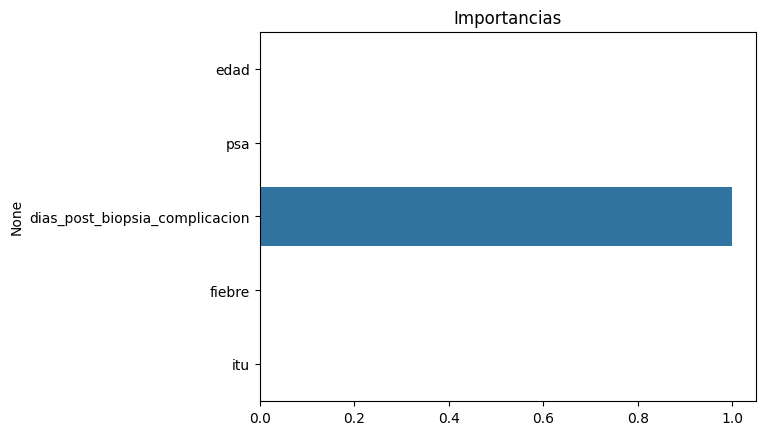

In [93]:
sns.barplot(y=X_selected_train.columns, x=clf.feature_importances_)
plt.title('Importancias')
plt.show()

[Text(0.5, 0.75, 'x[2] <= 0.0\ngini = 0.5\nsamples = 870\nvalue = [435, 435]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 435\nvalue = [435, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 435\nvalue = [0, 435]')]

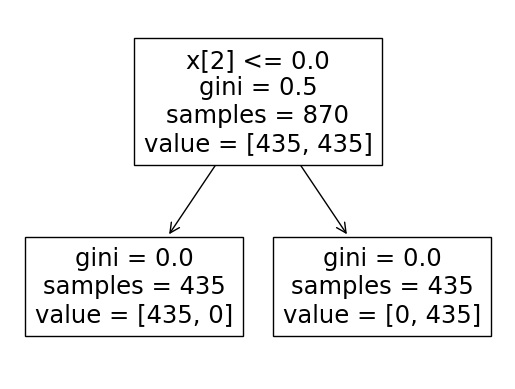

In [94]:
from sklearn.tree import plot_tree
plot_tree(clf)

<p>Como se ve en la gráfica, la variable dias_post_biopsia_complicacion es la única utilizada en el modelo. Aunque es posible que el modelo sea un buen predictor en datos generales, a continuación se probará nuevamente la grid sin esta columna.

## Árbol de decisión sin la variable dias_post_biopsia_complicacion

In [95]:
def plot_evaluacion(valores_variable, train_med, test_med, variable, medida):
    plt.figure(figsize=(12,7))
    plt.plot(valores_variable, train_med, color='r', label='Entrenamiento')
    plt.plot(valores_variable, test_med, color='g', label='Prueba')
    plt.title('Gráfico de ajuste del árbol', fontsize = 15)
    plt.legend()
    plt.ylabel(medida)
    plt.xlabel(variable)
    plt.show()

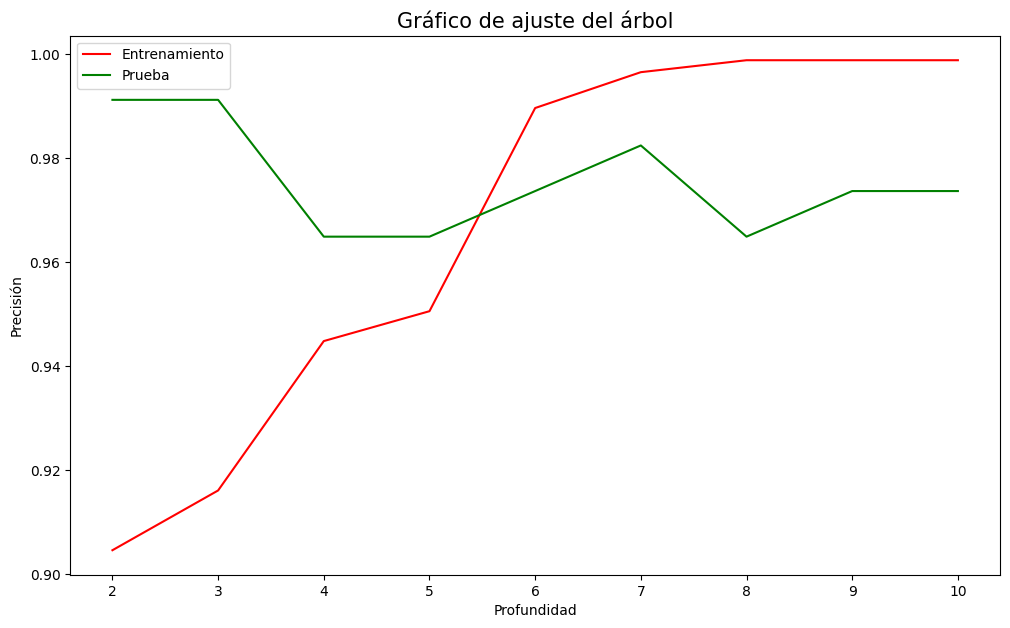

In [96]:
selector = SelectKBest(k=5, score_func=mutual_info_classif)
X_selected_train = (selector.fit_transform(
    X_train_esc.drop("dias_post_biopsia_complicacion", axis="columns"),
    y_train_over))
X_selected_test = selector.transform(X_test_esc.drop("dias_post_biopsia_complicacion", axis="columns"))
col_names = selector.get_feature_names_out()
X_selected_train = pd.DataFrame(X_selected_train, columns=col_names)
X_selected_test = pd.DataFrame(X_selected_test, columns=col_names)

train_prec =  []
test_prec = []
profundidades = range(2,11)

for deep in profundidades:
    clf = DecisionTreeClassifier(max_depth=deep, criterion='entropy')
    clf.fit(X_selected_train, y_train_over)
    train_prec.append(clf.score(X_selected_train, y_train_over))
    test_prec.append(clf.score(X_selected_test, y_test))

plot_evaluacion(profundidades, train_prec, test_prec, 'Profundidad', 'Precisión')

<p>Según el gráfico, la mejor combinación de bondad de ajuste para entrenamiento y prueba parece ser 6, así que se entrenará un árbol de profundidad 6.

In [97]:
clf = DecisionTreeClassifier(max_depth=6, random_state=42).fit(X_selected_train, y_train_over)
clf

DecisionTreeClassifier(max_depth=6, random_state=42)

In [98]:
print("Número de características: ", clf.max_features_)
print("Características: ", X_selected_train.columns)
print("Valores: ", clf.feature_importances_)

Número de características:  5
Características:  Index(['edad', 'psa', 'fiebre', 'itu', 'agente_aislado_E.COLI'], dtype='object')
Valores:  [0.17632399 0.14277951 0.6808965  0.         0.        ]


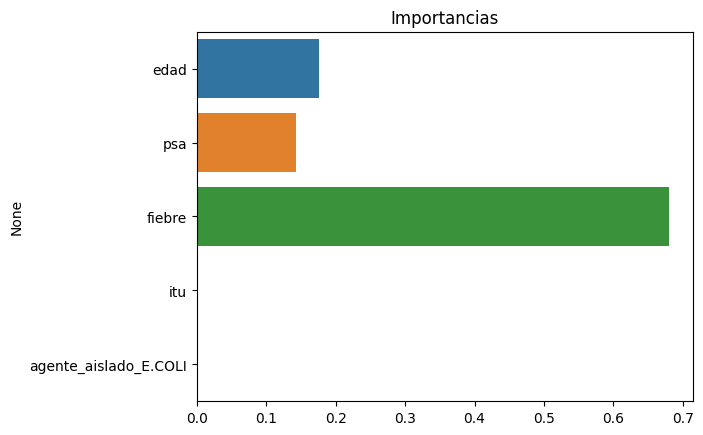

In [99]:
sns.barplot(y=X_selected_train.columns, x=clf.feature_importances_, hue=X_selected_train.columns)
plt.title('Importancias')
plt.show()

[Text(0.5416666666666666, 0.9285714285714286, 'x[2] <= 0.5\ngini = 0.5\nsamples = 870\nvalue = [435, 435]'),
 Text(0.3055555555555556, 0.7857142857142857, 'x[0] <= -1.75\ngini = 0.24\nsamples = 488\nvalue = [420, 68]'),
 Text(0.1111111111111111, 0.6428571428571429, 'x[0] <= -1.875\ngini = 0.35\nsamples = 31\nvalue = [7, 24]'),
 Text(0.05555555555555555, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.16666666666666666, 0.5, 'x[1] <= 0.027\ngini = 0.077\nsamples = 25\nvalue = [1, 24]'),
 Text(0.1111111111111111, 0.35714285714285715, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.2222222222222222, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.6428571428571429, 'x[1] <= -0.061\ngini = 0.174\nsamples = 457\nvalue = [413, 44]'),
 Text(0.4444444444444444, 0.5, 'x[1] <= -0.074\ngini = 0.416\nsamples = 149\nvalue = [105, 44]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[0] <= -0.792\ngini = 0.282\nsamples = 118\nvalue = [98, 20]'),
 Text(0

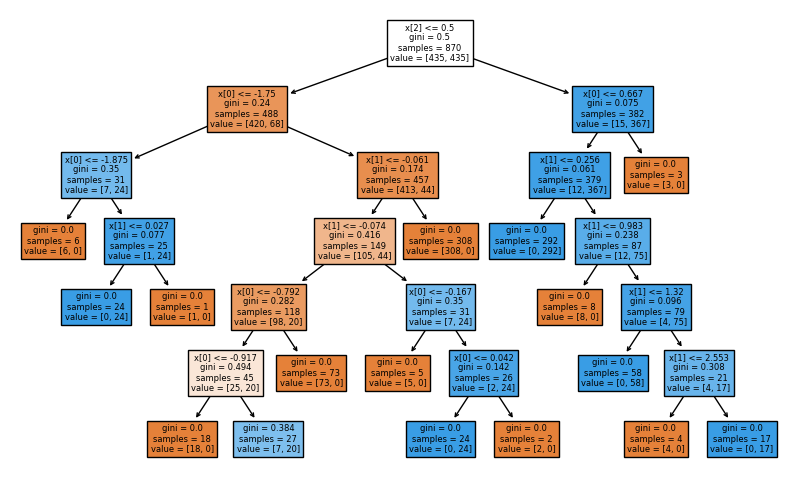

In [100]:
plt.figure(figsize=(10,6))
plot_tree(clf, filled=True)

<p>Validación con matriz de confusión

Accuracy:  0.9919540229885058
F1 Score:  0.9920182440136829
[[428   7]
 [  0 435]]


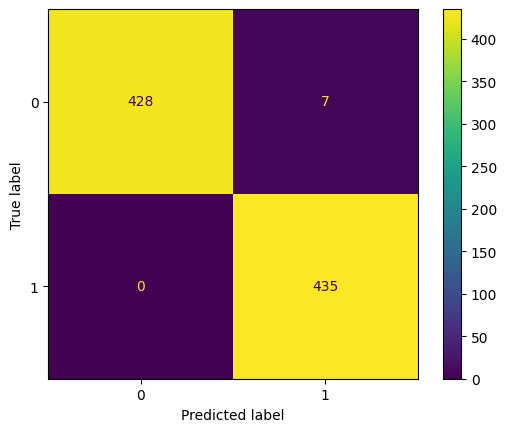

In [101]:
#Para entrenamiento
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

y_pred = clf.predict(X_selected_train)
print("Accuracy: ", accuracy_score(y_train_over,y_pred))
print("F1 Score: ", f1_score(y_train_over,y_pred))
print(confusion_matrix(y_train_over, y_pred))
ConfusionMatrixDisplay.from_predictions(y_train_over, y_pred)

Accuracy:  0.9649122807017544
F1 Score:  0.7142857142857143
[[105   4]
 [  0   5]]


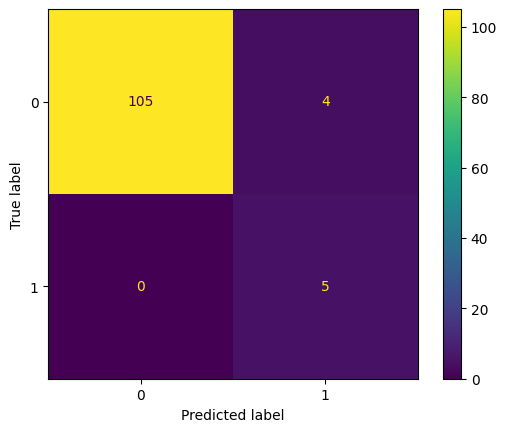

In [102]:
#Para prueba
y_pred = clf.predict(X_selected_test)
print("Accuracy: ", accuracy_score(y_test,y_pred))
print("F1 Score: ", f1_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

<p>En los datos de prueba, el modelo tuvo un F1 algo menor, de 0.71. Analizando las matrices de confusión, el modelo parece ser propenso a los falsos positivos, pero (según los datos proporcionados) es robusto a falsos negativos. Por tanto, el modelo da resultados aceptables respecto al problema que compete (detección de hospitalización).</p>
<p>A continuación, se evaluará un modelo de regresión logística con la penalidad por default L1.

## Regresióon logística sin la variable dias_post_biopsia_complicacion

In [103]:
clf = LogisticRegression(random_state=42).fit(X_selected_train, y_train_over)
clf

LogisticRegression(random_state=42)

Accuracy:  0.9241379310344827
F1 Score:  0.9221698113207547
[[413  22]
 [ 44 391]]


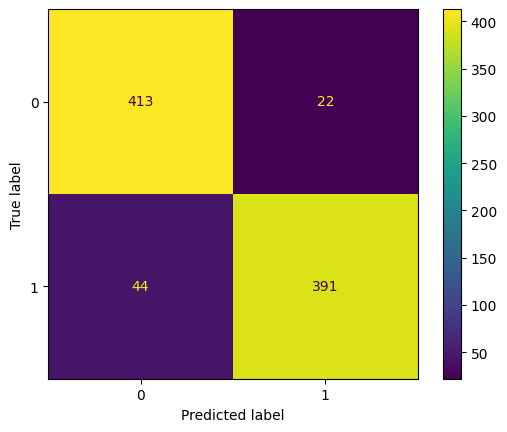

In [104]:
#Para entrenamiento
y_pred = clf.predict(X_selected_train)
print("Accuracy: ", accuracy_score(y_train_over,y_pred))
print("F1 Score: ", f1_score(y_train_over,y_pred))
print(confusion_matrix(y_train_over, y_pred))
ConfusionMatrixDisplay.from_predictions(y_train_over, y_pred)

Accuracy:  0.9912280701754386
F1 Score:  0.9090909090909091
[[108   1]
 [  0   5]]


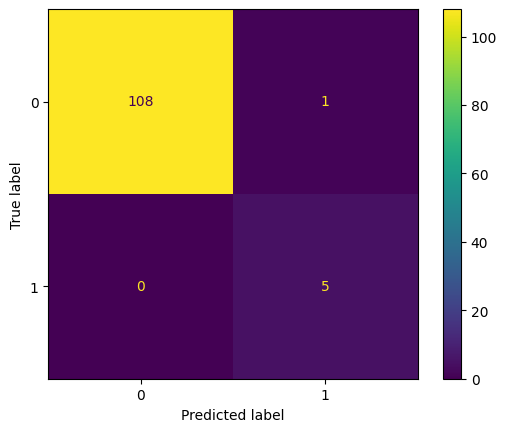

In [105]:
#Para prueba
y_pred = clf.predict(X_selected_test)
print("Accuracy: ", accuracy_score(y_test,y_pred))
print("F1 Score: ", f1_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

<p>En este caso, el puntaje F1 del modelo es mayor, pero es destacable que hay más falsos negativos en la evaluación de los datos de entrenamiento, por lo que no parece ser recomendable para el caso de uso planteado.

## Guardar modelos obtenidos

In [107]:
tree = make_pipeline(
    RobustScaler(),
    SelectKBest(k=5, score_func=mutual_info_classif),
    DecisionTreeClassifier(max_depth=6, random_state=42)
).fit(X_train_over, y_train_over)
print(tree)

log_reg = make_pipeline(
    RobustScaler(),
    SelectKBest(k=5, score_func=mutual_info_classif),
    LogisticRegression(random_state=42)
).fit(X_train_over, y_train_over)
log_reg

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('selectkbest',
                 SelectKBest(k=5,
                             score_func=<function mutual_info_classif at 0x7e3adcf8de10>)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=6, random_state=42))])


Pipeline(steps=[('robustscaler', RobustScaler()),
                ('selectkbest',
                 SelectKBest(k=5,
                             score_func=<function mutual_info_classif at 0x7e3adcf8de10>)),
                ('logisticregression', LogisticRegression(random_state=42))])

In [108]:
import pickle

pickle.dump(tree, open('arbol_decision.pkl', 'wb'))
pickle.dump(log_reg, open('regresion_logistica.pkl', 'wb'))

In [109]:
import joblib

joblib.dump(tree, open('arbol_decision.joblib', 'wb'))
joblib.dump(log_reg, open('regresion_logistica.joblib', 'wb'))